In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
position_changes_df = pd.read_csv("position_changes.csv")
position_changes_df.drop(columns=["Unnamed: 0"], inplace=True)
position_changes_df["time"] = pd.to_datetime(position_changes_df["timestamp"], unit='s')
position_changes_df["day_of_year"] = position_changes_df["time"].dt.dayofyear

In [4]:
tokens_addresses_to_names_dict = {
    "0x86f1e0420c26a858fc203a3645dd1a36868f18e5": "vBTC",
    "0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb": "vETH",
    "0x5faa136fc58b6136ffdaeaac320076c4865c070f": "vAVAX",
    "0xb24f50dd9918934ab2228be7a097411ca28f6c14": "vLUNA",
    "0x151bb01c79f4516c233948d69dae39869bccb737": "vSOL",
    "0x7161c3416e08abaa5cd38e68d9a28e43a694e037": "vCRV",
    "0x333b1ea429a88d0dd48ce7c06c16609cd76f43a8": "vSAND",
    "0x2f198182ec54469195a4a06262a9431a42462373": "vLINK",
    "0x5f714b5347f0b5de9f9598e39840e176ce889b9c": "vATOM",
    "0x77d0cc9568605bfff32f918c8ffaa53f72901416": "vONE",
    "0x3fb3282e3ba34a0bff94845f1800eb93cc6850d4": "vNEAR",
    "0x2db8d2db86ca3a4c7040e778244451776570359b": "vFTM",
    "0x7eada83e15acd08d22ad85a1dce92e5a257acb92": "vFLOW",
    "0xb6599bd362120dc70d48409b8a08888807050700": "vBNB",
    "0x9482aafdced6b899626f465e1fa0cf1b1418d797": "vPERP",
    "0xbe5de48197fc974600929196239e264ecb703ee8": "vMATIC",
    "0x34235c8489b06482a99bb7fcab6d7c467b92d248": "vAAVE",
    "0x9d34f1d15c22e4c0924804e2a38cbe93dfb84bc2": "vAPE"
}

position_changes_df["pool_name"] = position_changes_df["base_token"].replace(tokens_addresses_to_names_dict)

In [5]:
position_changes_df[["pool_name", "realized_pnl"]].groupby("pool_name").sum().sort_values("realized_pnl").T

pool_name             vETH          vLUNA          vAVAX           vBTC  \
realized_pnl -1.247354e+06 -832146.780223 -807460.632148 -662304.777182   

pool_name              vSOL           vCRV          vSAND          vNEAR  \
realized_pnl -620204.267864 -496225.109346 -370757.479279 -321376.171747   

pool_name              vONE          vLINK          vATOM           vFTM  \
realized_pnl -310889.590278 -274401.177566 -221901.981255 -195389.187721   

pool_name            vFLOW         vAAVE         vPERP        vMATIC  \
realized_pnl -98751.997988 -65954.955963 -62944.041053 -55053.417334   

pool_name             vBNB          vAPE  
realized_pnl -32327.773432 -26192.288041

Conform status of taken losses and profits can be seen that most interesting pools are ```vETH, vLUNA, vAVAX, vBTC```. Also, considering connection between platform and token ```PERP``` it is also required to review and this case.

In [6]:
position_changes_df[["pool_name", "open_notional"]].groupby("pool_name").mean().sort_values("open_notional")

open_notional
pool_name               
vONE        -3682.400098
vLINK       -2403.740750
vCRV        -2377.016177
vAPE         1368.181928
vBNB         7814.082772
vLUNA       15125.365438
vAAVE       21178.573424
vFLOW       21883.987046
vFTM        22291.863652
vATOM       26428.453664
vNEAR       29583.859508
vSAND       32997.263483
vPERP       34650.221381
vSOL        41510.961776
vMATIC      44597.285514
vAVAX       59319.657868
vETH        68490.017956
vBTC        71779.168034

Conform mean capitalization of positions it is required to review pools mentioned above and also to review ```vMATIC``` pool

# Track of the position capitalization for biggest traders

The problem of ```open_notional``` feature is that it reflects state of the trader's position at the moment of applied change and therefore plot of this variable for every trader will be noisy it will be better to show this variable for the biggest traders. For analysis were chosen 4 tokens: vBTC (one of the biggest tokens by price), vETH (one of the most popular tokens), vPERP (because it is connected with reviewable platform), vMATIC (because it will be great to see one small token from all pespectives)

In each of those pools will be chosen top list of traders and for top 10 of them will be shown progress of ```open_notional``` through time.

Initial stage of traders analysis will be performed via collecting daily sum of profits and fees respective to the mean ```open_notional``` over time, after which will be performed drawing of the activity parameters over time.

## BTC

In [7]:
btc_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vBTC"]
btc_position_changes_df

id  \
0        0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...   
1        0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...   
5        0x8699da2d3dee9c704dbf13705c75524e618b2a83c8c3...   
6        0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...   
8        0xafd072396a583899b937b805d056ac759b6bb26c60a1...   
...                                                    ...   
1834760  0x4cd11eb2e25767468ce237bc98a684e9141ad8fdbfc1...   
1834780  0xd833bfead35c14a489079c02296ddc3d51dfbb18fd5b...   
1834797  0x01e84f1739d85ac2e019923863ea90b93c1890530496...   
1834850  0x39c514a21856f501e0d48ba0d86abe6dba24afc2476e...   
1834851  0xb66572772d3264212f248be992477319024fde56fc22...   

                                                   tx_hash  \
0        0x0bc364e9f5a99c87cfb5c1f4a6ef2b9784e872092805...   
1        0x0ccfa4751250a5374b5d28823a1011987b833f71a1ce...   
5        0x8699da2d3dee9c704dbf13705c75524e618b2a83c8c3...   
6        0x9a9ef69c82d19bde6a2794c5de22bbb02dd3b2b4f048...   
8        0xafd072396a583899b937b805d056ac759b6bb26c60a1...   
...                                                    ...   
1834760  0x4cd11eb2e25767468ce237bc98a684e9141ad8fdbfc1...   
1834780  0xd833bfead35c14a489079c02296ddc3d51dfbb18fd5b...   
1834797  0x01e84f1739d85ac2e019923863ea90b93c1890530496...   
1834850  0x39c514a21856f501e0d48ba0d86abe6dba24afc2476e...   
1834851  0xb66572772d3264212f248be992477319024fde56fc22...   

                                             trader  \
0        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
1        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
5        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
6        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
8        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
...                                             ...   
1834760  0x964a34db5b676c247584e05016eede3563e5967c   
1834780  0x25d2415b78bd1d5794934b6b2204b349c1cef7da   
1834797  0x8d86c5fe066a9ddcfde62884797dbe213151a22b   
1834850  0x964a34db5b676c247584e05016eede3563e5967c   
1834851  0x25d2415b78bd1d5794934b6b2204b349c1cef7da   

                                         base_token  exchanged_position_size  \
0        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055019   
1        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055098   
5        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055138   
6        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.055178   
8        0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.054979   
...                                             ...                      ...   
1834760  0x86f1e0420c26a858fc203a3645dd1a36868f18e5                -0.085100   
1834780  0x86f1e0420c26a858fc203a3645dd1a36868f18e5                -0.151000   
1834797  0x86f1e0420c26a858fc203a3645dd1a36868f18e5                 0.090910   
1834850  0x86f1e0420c26a858fc203a3645dd1a36868f18e5                -0.085368   
1834851  0x86f1e0420c26a858fc203a3645dd1a36868f18e5                -0.151000   

         exchanged_position_notional       fee  open_notional  realized_pnl  \
0                       -2997.000000  3.000000  -15000.000000      0.000000   
1                       -2997.000000  3.000000   -9000.000000      0.000000   
5                       -2997.000000  3.000000   -6000.000000      0.000000   
6                       -2997.000000  3.000000   -3000.000000      0.000000   
8                       -2997.000000  3.000000  -18000.000000      0.000000   
...                              ...       ...            ...           ...   
1834760                  3382.539491  3.382539  -13402.097388     -1.280659   
1834780                  6003.445538  6.003446   42504.306265      0.000000   
1834797                 -3613.491853  3.617109  -20250.071326      0.000000   
1834850                  3392.143528  3.392144  -10011.001451     -2.344553   
1834851                  6001.570034  6.001570   48499.874729      0.000000

In [8]:
trader_btc_position_changes_df = btc_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_btc_open_notional_mean_df = btc_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_btc_position_changes_df["open_notional"] = daily_btc_open_notional_mean_df["open_notional"]
trader_btc_position_changes_df

fee  realized_pnl  \
trader                                                                
0x000872be5ec7dc8197ef6618ef507d9a449cac1a   0.227951     -0.162458   
0x00189ff48605528b577e7794b1f3ba0888888888   0.690059     -8.067806   
0x00695c7fcd8ee1517adb85c24547fc792613a5c5  19.978627    -31.351652   
0x00a99f4bf5d465f303b6bb8cb53f5ca5e6046ba8   1.149371    -71.049237   
0x0112bef73098ca5cb9d62fdd35bea9cd778a40f1   0.215892     -0.215892   
...                                               ...           ...   
0xff5ae7f6be86dec4972e39d548dfbb241142bd93   0.302562     -0.302562   
0xff646b759b2a0164b6e9937baa0a34ce90cc288e   0.199900     -0.199900   
0xff65fe4f30af41af4e02772f4707f32a83491530   0.020011      0.000513   
0xff9bfd415a0f1a775cc6b7a9ba7f802c22b19fde   0.371187    -20.826547   
0xffaa394fb6394e2ea09f2d0fcd887a11127e4985   0.216228      0.119564   

                                            open_notional  
trader                                                     
0x000872be5ec7dc8197ef6618ef507d9a449cac1a     -57.000000  
0x00189ff48605528b577e7794b1f3ba0888888888     -87.223200  
0x00695c7fcd8ee1517adb85c24547fc792613a5c5   -5000.000000  
0x00a99f4bf5d465f303b6bb8cb53f5ca5e6046ba8    -304.970202  
0x0112bef73098ca5cb9d62fdd35bea9cd778a40f1     -54.000000  
...                                                   ...  
0xff5ae7f6be86dec4972e39d548dfbb241142bd93     -37.839134  
0xff646b759b2a0164b6e9937baa0a34ce90cc288e     -50.000000  
0xff65fe4f30af41af4e02772f4707f32a83491530      -5.000000  
0xff9bfd415a0f1a775cc6b7a9ba7f802c22b19fde     -48.979738  
0xffaa394fb6394e2ea09f2d0fcd887a11127e4985     -54.000000  

[2543 rows x 3 columns]

In [9]:
trader_btc_position_changes_df.sort_values(by=["realized_pnl"], inplace=True)
trader_btc_position_changes_df

fee   realized_pnl  \
trader                                                                     
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7  292294.870797 -642811.481412   
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a     764.932190 -107966.046260   
0x793dd4db52f8769404aa3093a510d540a8ff1e9b    1104.122793  -65620.300636   
0x01995482aad438fa20f783ee599a1871af2563c1     907.437453  -44663.233764   
0x27684cfc20021e3783dc1921a5ed31a454e17e02     759.276454  -29448.453264   
...                                                   ...            ...   
0x25d2415b78bd1d5794934b6b2204b349c1cef7da  172043.267944   38557.937718   
0x8a7cd6f15877a49f91189d311f026eb929228448   38402.969994   39867.385979   
0xa2600926786e9c2e1fa4b4a1118ddf0bfe1e7f91   12114.288264   41729.092636   
0x675e328b73e15cd41acd2828b83b417687c36bba    3134.353249   57297.019140   
0x559f87695c74d8505e7c8e159b5fd8f3fdbfee3c     934.211681   69316.191520   

                                            open_notional  
trader                                                     
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7  274923.803211  
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a -283755.081861  
0x793dd4db52f8769404aa3093a510d540a8ff1e9b  -45046.997834  
0x01995482aad438fa20f783ee599a1871af2563c1 -156124.493700  
0x27684cfc20021e3783dc1921a5ed31a454e17e02 -156318.494083  
...                                                   ...  
0x25d2415b78bd1d5794934b6b2204b349c1cef7da   27738.766076  
0x8a7cd6f15877a49f91189d311f026eb929228448   35779.646158  
0xa2600926786e9c2e1fa4b4a1118ddf0bfe1e7f91   21999.698592  
0x675e328b73e15cd41acd2828b83b417687c36bba -238611.588290  
0x559f87695c74d8505e7c8e159b5fd8f3fdbfee3c  205368.704874  

[2543 rows x 3 columns]

In [10]:
print("sum of entire trading PnL = " + str(trader_btc_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_btc_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_btc_position_changes_df[trader_btc_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_btc_position_changes_df[trader_btc_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -662304.7771822741
sum of fees = 756379.7054366021
count of profiters = 363
count of persons with losses = 2180


Results demonstrate extremely high losses because of trading and overall result shifts to the losses as the result of trading activity, but in case of removing the trader with biggest losses can be seen that PnL will shift to the balance between profits and losses. Therefore, it is required to check how many traders got losses in result of performing trades on specific pool

Results show that there are 363 profiters and 2180 traders with negative results of trading.

In [11]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_btc_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_btc_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

While profits are more evenly distributed between top-10 traders by profits, the losses are not so evenly distributed between biggest lossers. Interesting aspect is that losses have much bigger range of values because of one single outlier. Ignoring this outlier will lead to the some sort of "balance" in losses and profits.

In case of requesting address 0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 on the optimism scan can be seen that this address performs trading in a manner similar to the simple trader, but the values circulating through this address (there are only PERP and USDC tokens movement) are extremely high. Optimism also contains data about one withdrawal of the PERP token around middle of January 2022 (47 620,89 PERP or considering that mean price of PERP during January was around 9$ it is equal to 428 588 USD)

In [12]:
btc_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vBTC"]
biggest_losser_btc_position_changes_df = btc_position_changes_df[btc_position_changes_df["trader"] == 
                                                             "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_btc_position_changes_df["time"], biggest_losser_btc_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 over time in BTC pool")
ax.grid(True, linestyle='--')
plt.show()

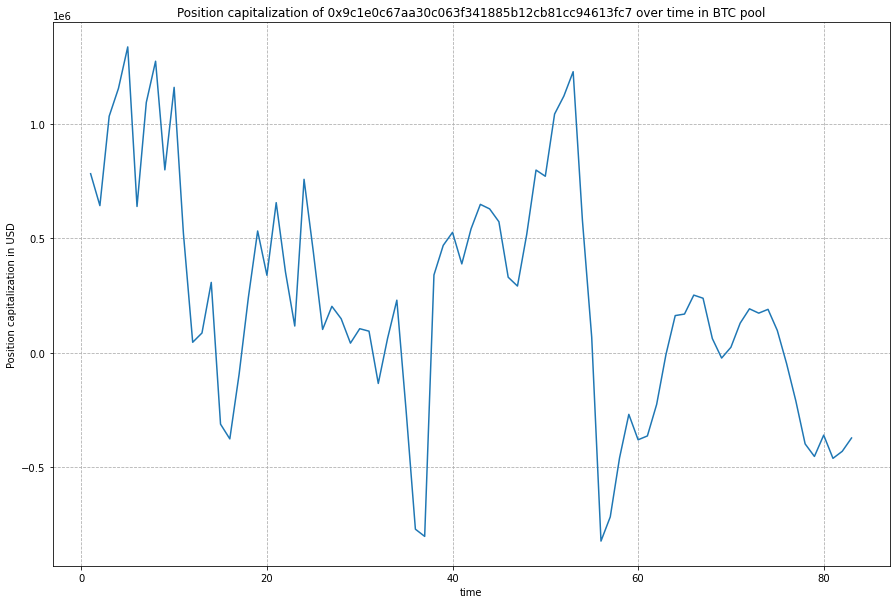

In [13]:
biggest_losser_btc_daily_position_changes_df = biggest_losser_btc_position_changes_df[["day_of_year", "open_notional"]
                                                                                      ].groupby("day_of_year").mean()

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_btc_daily_position_changes_df[biggest_losser_btc_daily_position_changes_df.index < 200].index, 
        biggest_losser_btc_daily_position_changes_df[biggest_losser_btc_daily_position_changes_df.index < 200]["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 over time in BTC pool")
ax.grid(True, linestyle='--')
plt.show()

### Analyzing top 10 lossers

Considering that it is required to check top 10 traders below are presented open notional distributions for the top 10 traders with their pure values over time and daily mean

In [14]:
colors = ["red", "maroon", "darkorange", "darkgreen", "lightseagreen", 
          "darkslategray", "steelblue", "purple", "magenta", "deeppink"]

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_btc_position_changes_df.head(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

In [16]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_btc_position_changes_df.head(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_btc_position_changes_df.head(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_btc_position_changes_df.head(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

Comparing result of lossers relative to profiters can be seen that most of the traders in lossers section were performing their activity with big position capitalizations and changes were not so often and small. On the charts can be seen how strong is the shift of PnL to big losses and that lossers paid small fees (only the bigges losser has paid a lot of fees because of the big changes applied with higher frequency compared to other lossers)

### Analyzing top 10 profiters

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_btc_position_changes_df.tail(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 profiters")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

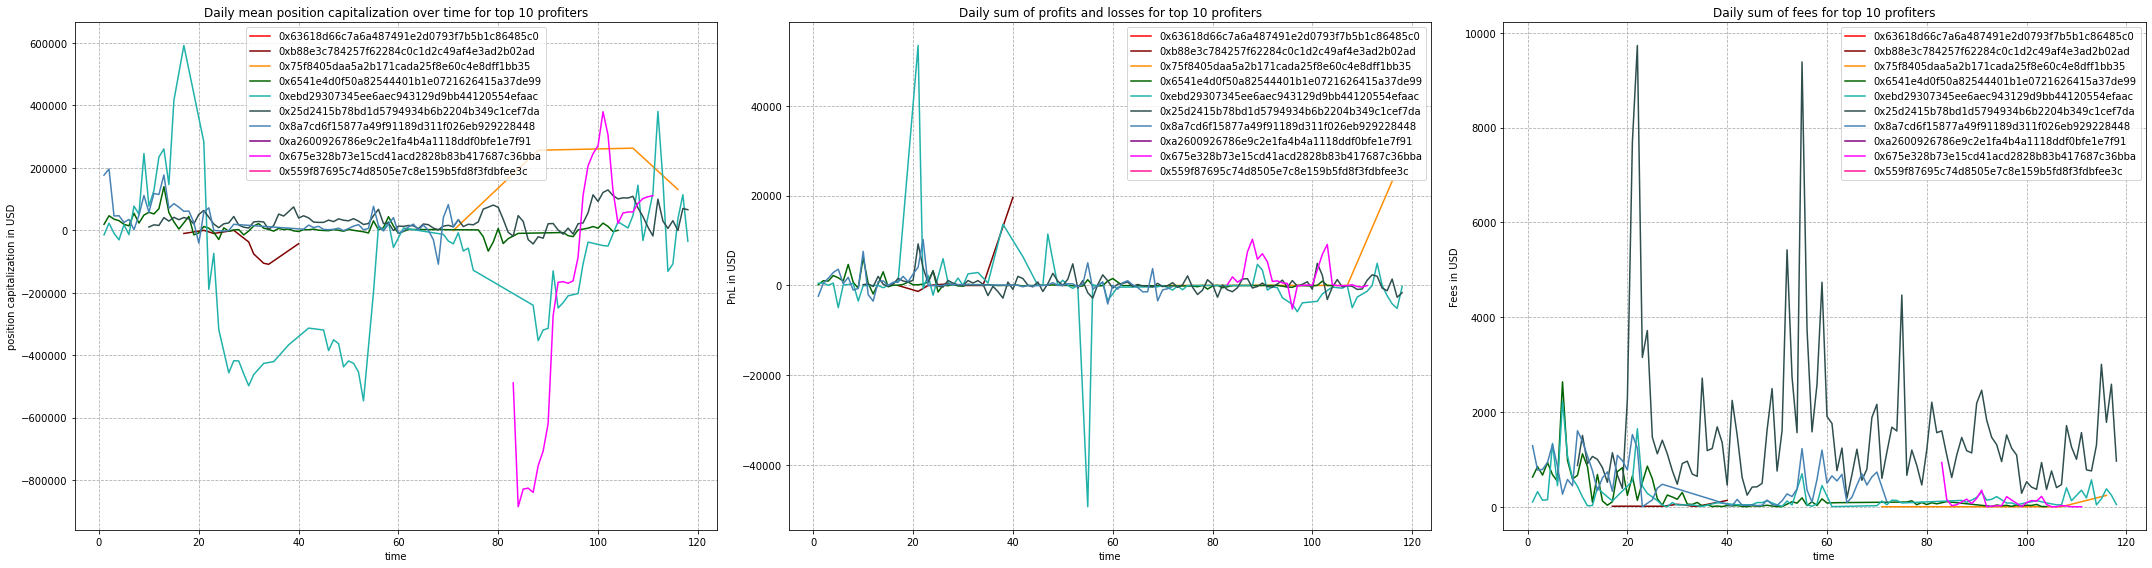

In [18]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_btc_position_changes_df.tail(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_btc_position_changes_df.tail(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_btc_position_changes_df.tail(10).index:
    traderwise_data_df = btc_position_changes_df[btc_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

## ETH

In [19]:
eth_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vETH"]
eth_position_changes_df

id  \
2        0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...   
3        0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...   
4        0x548dd8a96b9faa92066283339832e380fd506f4ebc94...   
7        0x9b6ea00e0e7e7610105cf3eb2f97727c93103a9816b6...   
9        0xe505626b5d32532a83c5d5bc30c7d44bb1b00f01f113...   
...                                                    ...   
1834759  0x4ae24e715000fb6146fff4474cd90d4002a8eed64041...   
1834761  0x5c8189ffb467d5c263cac8d33b7a6f2c1a48629ef16f...   
1834789  0xf7a96945de1006f2db70cdfd25900fe470aad62d87bf...   
1834827  0xc0923f6efbd9a4bd20183bfe47c01fecde7b50d13cf5...   
1834852  0xf231bb30e1ce48cda4a914324702e63c8e86bfb7b1d8...   

                                                   tx_hash  \
2        0x0e085ae4b7c345ee6de6d67f16c8c127a694d1c9f27f...   
3        0x47357bec5ee7101b57f457be5135c91a9c7133cc82bb...   
4        0x548dd8a96b9faa92066283339832e380fd506f4ebc94...   
7        0x9b6ea00e0e7e7610105cf3eb2f97727c93103a9816b6...   
9        0xe505626b5d32532a83c5d5bc30c7d44bb1b00f01f113...   
...                                                    ...   
1834759  0x4ae24e715000fb6146fff4474cd90d4002a8eed64041...   
1834761  0x5c8189ffb467d5c263cac8d33b7a6f2c1a48629ef16f...   
1834789  0xf7a96945de1006f2db70cdfd25900fe470aad62d87bf...   
1834827  0xc0923f6efbd9a4bd20183bfe47c01fecde7b50d13cf5...   
1834852  0xf231bb30e1ce48cda4a914324702e63c8e86bfb7b1d8...   

                                             trader  \
2        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
3        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
4        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
7        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
9        0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
...                                             ...   
1834759  0xd7590b07bbc2e6904bbf4d18aca6d5bf58a20813   
1834761  0x91d46a68324991f2e96f121317b642a8d4179190   
1834789  0x91d46a68324991f2e96f121317b642a8d4179190   
1834827  0x91d46a68324991f2e96f121317b642a8d4179190   
1834852  0x91d46a68324991f2e96f121317b642a8d4179190   

                                         base_token  exchanged_position_size  \
2        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.729828   
3        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.728137   
4        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.729264   
7        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.728700   
9        0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                 0.727574   
...                                             ...                      ...   
1834759  0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                -1.978786   
1834761  0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                -2.041002   
1834789  0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                -2.039185   
1834827  0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                -2.383342   
1834852  0x8c835dfaa34e2ae61775e80ee29e2c724c6ae2bb                -2.382999   

         exchanged_position_notional       fee  open_notional  realized_pnl  \
2                       -2997.000000  3.000000   -3000.000000           0.0   
3                       -2997.000000  3.000000  -12000.000000           0.0   
4                       -2997.000000  3.000000   -6000.000000           0.0   
7                       -2997.000000  3.000000   -9000.000000           0.0   
9                       -2997.000000  3.000000  -15000.000000           0.0   
...                              ...       ...            ...           ...   
1834759                  5814.970414  5.814970   39086.151034           0.0   
1834761                  5999.392072  5.999392  154022.992802           0.0   
1834789                  5995.663657  5.995664  148029.600122           0.0   
1834827                  7001.806630  7.001807  161017.797626           0.0   
1834852                  6998.599973  6.998600  168009.398999           0.0

In [20]:
trader_eth_position_changes_df = eth_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_eth_open_notional_mean_df = eth_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_eth_position_changes_df["open_notional"] = daily_eth_open_notional_mean_df["open_notional"]
trader_eth_position_changes_df.sort_values("realized_pnl", inplace=True)
trader_eth_position_changes_df

fee   realized_pnl  \
trader                                                                     
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7  513277.915788 -983719.628895   
0x9455b22685036d89874296460fb28de8a70a6a66    2276.409372 -688397.054486   
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a     670.645116 -135672.223819   
0x914b4e4e4301a421fe1503243f61970c1cc96c4e     850.362100  -89367.194568   
0xadc8aaddf5dcf81366fcc0212c154dfbfde1ed13    1455.925676  -72024.050248   
...                                                   ...            ...   
0x91d46a68324991f2e96f121317b642a8d4179190  303699.217025  121515.454784   
0x8a7cd6f15877a49f91189d311f026eb929228448   77568.260838  127052.806156   
0x06b23dc3fb948fd800dcad8a800b60fd0e5401bc   14005.129580  150665.898133   
0x36209cad56c31332d575bed3e989c988c2ad8eee   25481.080889  154713.069204   
0x8de2e51c5e84df78fabce4134afe27b3f0116d4c    5666.264699  238049.348081   

                                            open_notional  
trader                                                     
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   2.536846e+05  
0x9455b22685036d89874296460fb28de8a70a6a66  -1.305971e+06  
0x7c132bde28ad1e0101d45121757d7c6c2e8a550a  -1.610965e+05  
0x914b4e4e4301a421fe1503243f61970c1cc96c4e  -2.621542e+05  
0xadc8aaddf5dcf81366fcc0212c154dfbfde1ed13  -1.036502e+05  
...                                                   ...  
0x91d46a68324991f2e96f121317b642a8d4179190   6.106422e+04  
0x8a7cd6f15877a49f91189d311f026eb929228448   3.402498e+04  
0x06b23dc3fb948fd800dcad8a800b60fd0e5401bc   5.951403e+04  
0x36209cad56c31332d575bed3e989c988c2ad8eee   2.687647e+05  
0x8de2e51c5e84df78fabce4134afe27b3f0116d4c   1.041731e+06  

[8790 rows x 3 columns]

In [21]:
print("sum of entire trading PnL = " + str(trader_eth_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_eth_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_eth_position_changes_df[trader_eth_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_eth_position_changes_df[trader_eth_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -1247354.3785395666
sum of fees = 1421220.757496434
count of profiters = 921
count of persons with losses = 7869


Results demonstrate that there are a lot of traders who got losses in result of their activity on the ETH pool. Overall result demonstrated big losses and big fees paid for transactions. Considering number of persons with losses it is more likely that here will be the same situation with concentration for most of the traders around small profits or losses.

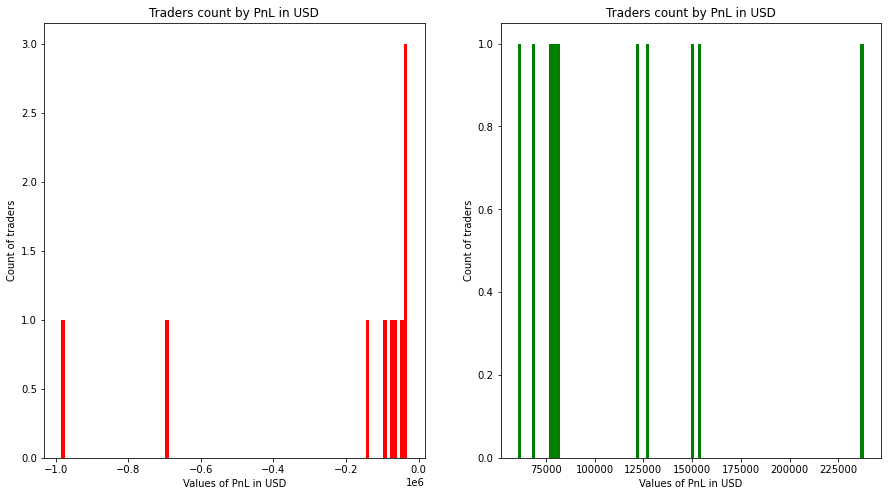

In [22]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_eth_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_eth_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

Here can be seen the same interesting moment as in the previous pool when range of negative values is much bigger and overall concentration of values is similar and may be close to form a "balance" between profits and losses, but in this case two outliers on the losses side cause great shift of the final PnL to the negative side.

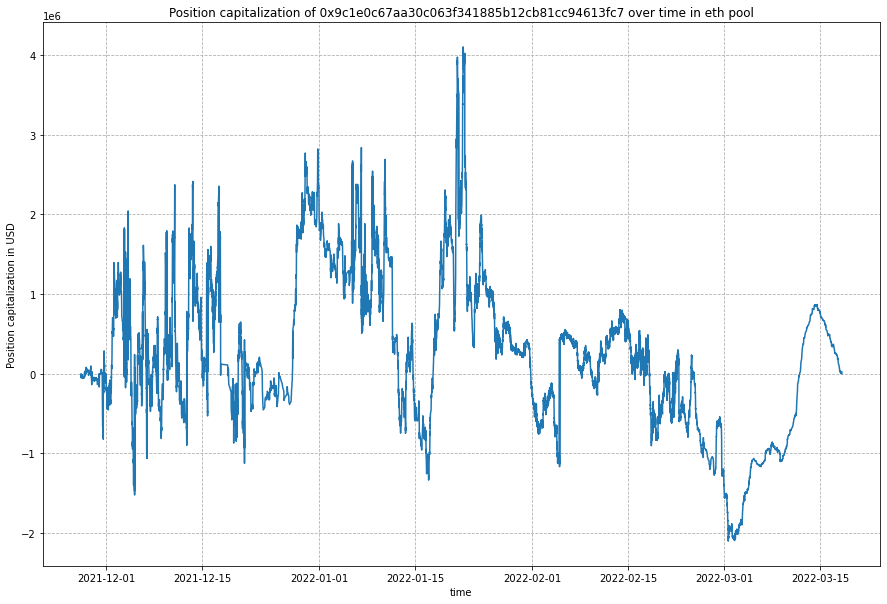

In [23]:
eth_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vETH"]
biggest_losser_eth_position_changes_df = eth_position_changes_df[eth_position_changes_df["trader"] == 
                                                             "0x9c1e0c67aa30c063f341885b12cb81cc94613fc7"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_eth_position_changes_df["time"], biggest_losser_eth_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 over time in eth pool")
ax.grid(True, linestyle='--')
plt.show()

### Top 10 lossers

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_eth_position_changes_df.head(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

In [25]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_eth_position_changes_df.head(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_eth_position_changes_df.head(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_eth_position_changes_df.head(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Top 10 profiters

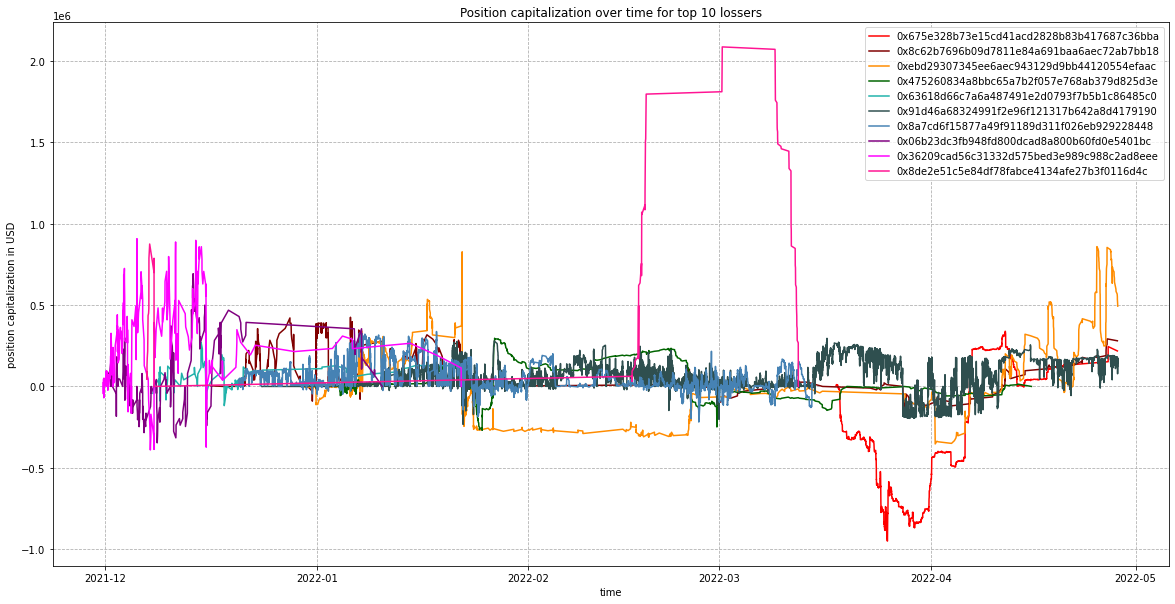

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_eth_position_changes_df.tail(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

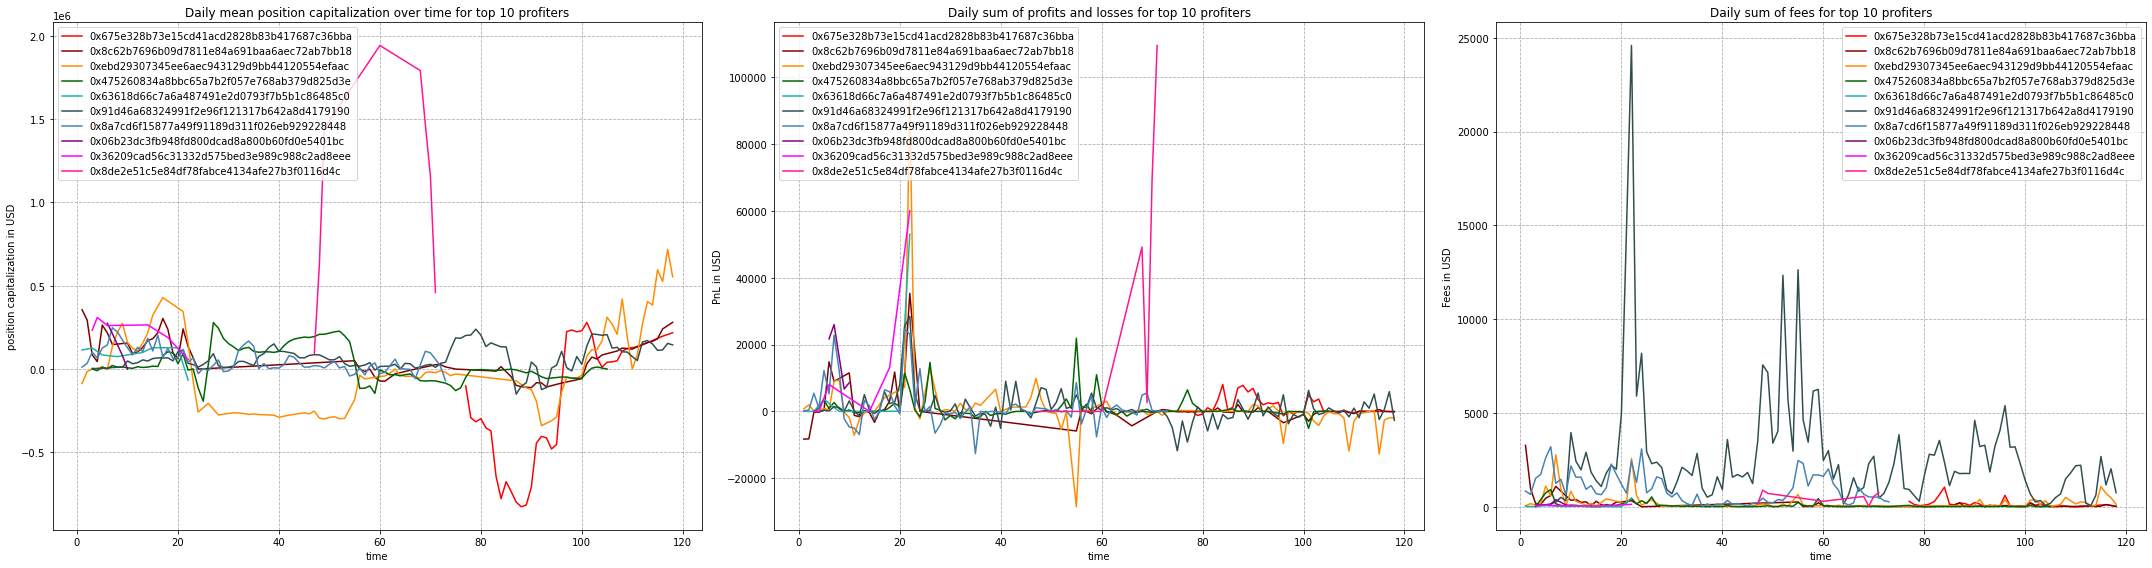

In [27]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_eth_position_changes_df.tail(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_eth_position_changes_df.tail(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_eth_position_changes_df.tail(10).index:
    traderwise_data_df = eth_position_changes_df[eth_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

Situation in this pool is similar to the one with vBTC. Most profitable traders change their positions with a high frequency adapting to the changes happening on the market. Most likely such frequency means bots activity. Compared to the vBTC pool current one contains better distribution of the profits and can be seen that there is bigger shift to the positive values.

## PERP

In [28]:
perp_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vPERP"]
perp_position_changes_df

id  \
964368   0x47773e291f1b1edbb0068fe691d3efa3cebd7bdd4fc4...   
964386   0xabc13010d4060afb10cf34db659b373cc02cf0ed33eb...   
964387   0x07b4f38fd7b09902d831fbc35d23a4f72cb7982381e0...   
964395   0x17b0222da0e8136a2b9d30cd698464dd18c9ecf94908...   
964398   0x293e4b78fe41918a37e42d58e1c0055fcb0d44b29653...   
...                                                    ...   
1834497  0xfd6ea4a0340adeea90d187dd14fe024f48b4a24567f9...   
1834527  0x7f016887b767424b1d423e544a9313e136e52c67c351...   
1834539  0xea4075b291936859e0268082608fcaae1271b297f55a...   
1834555  0xf5ab4b7631fff3758fe2f71eb6002db9f9646ec5c707...   
1834697  0x4b2a12380f8ca9e7b0b69ec2b5323064e8defbf89962...   

                                                   tx_hash  \
964368   0x47773e291f1b1edbb0068fe691d3efa3cebd7bdd4fc4...   
964386   0xabc13010d4060afb10cf34db659b373cc02cf0ed33eb...   
964387   0x07b4f38fd7b09902d831fbc35d23a4f72cb7982381e0...   
964395   0x17b0222da0e8136a2b9d30cd698464dd18c9ecf94908...   
964398   0x293e4b78fe41918a37e42d58e1c0055fcb0d44b29653...   
...                                                    ...   
1834497  0xfd6ea4a0340adeea90d187dd14fe024f48b4a24567f9...   
1834527  0x7f016887b767424b1d423e544a9313e136e52c67c351...   
1834539  0xea4075b291936859e0268082608fcaae1271b297f55a...   
1834555  0xf5ab4b7631fff3758fe2f71eb6002db9f9646ec5c707...   
1834697  0x4b2a12380f8ca9e7b0b69ec2b5323064e8defbf89962...   

                                             trader  \
964368   0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be   
964386   0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be   
964387   0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be   
964395   0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be   
964398   0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be   
...                                             ...   
1834497  0x7ce5d3bd353bbdc3940e834142fb05d56250fbbd   
1834527  0x7ce5d3bd353bbdc3940e834142fb05d56250fbbd   
1834539  0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca   
1834555  0x3c7c74a855b1eedd72c74c6cb3f2a55e7807575a   
1834697  0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca   

                                         base_token  exchanged_position_size  \
964368   0x9482aafdced6b899626f465e1fa0cf1b1418d797               331.399764   
964386   0x9482aafdced6b899626f465e1fa0cf1b1418d797               397.345285   
964387   0x9482aafdced6b899626f465e1fa0cf1b1418d797               396.980925   
964395   0x9482aafdced6b899626f465e1fa0cf1b1418d797               198.353984   
964398   0x9482aafdced6b899626f465e1fa0cf1b1418d797               330.388000   
...                                             ...                      ...   
1834497  0x9482aafdced6b899626f465e1fa0cf1b1418d797               500.000000   
1834527  0x9482aafdced6b899626f465e1fa0cf1b1418d797               500.000000   
1834539  0x9482aafdced6b899626f465e1fa0cf1b1418d797               531.200863   
1834555  0x9482aafdced6b899626f465e1fa0cf1b1418d797               309.602358   
1834697  0x9482aafdced6b899626f465e1fa0cf1b1418d797               529.901528   

         exchanged_position_notional       fee  open_notional  realized_pnl  \
964368                  -1498.500000  1.500000   -1500.000000      0.000000   
964386                  -1798.200000  1.800000   -3300.000000      0.000000   
964387                  -1798.200000  1.800000   -5100.000000      0.000000   
964395                   -899.100000  0.900000   -6000.000000      0.000000   
964398                  -1498.500000  1.500000   -7500.000000      0.000000   
...                              ...       ...            ...           ...   
1834497                 -1880.569371  1.882452       0.000000     -5.680906   
1834527                 -1882.375368  1.884260   -1884.259628      0.000000   
1834539                 -2001.820308  2.003824  -20796.681101      0.000000   
1834555                 -1167.673427  1.168842   -6176.428791      0.000000   
1834697                 -2000.149260  2.002151  -22798.832513      0.000000

In [29]:
trader_perp_position_changes_df = perp_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_perp_open_notional_mean_df = perp_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_perp_position_changes_df["open_notional"] = daily_perp_open_notional_mean_df["open_notional"]
trader_perp_position_changes_df.sort_values("realized_pnl", inplace=True)
trader_perp_position_changes_df

fee  realized_pnl  \
trader                                                                   
0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be  29516.044745 -90223.052140   
0x8a88dfcc83c2999a81634899f55512a88d0d84b2    189.745152 -22033.070294   
0x36fd72c66e564d88a1efe8f2177c6c022910ed23    551.200586  -7309.661057   
0x4b8be7b8c65f055f05cb5a5de1b02358454b03d5     74.304452  -5019.292021   
0x05c4da5cac44f12eef60915cb192effd60321e7e    658.825824  -4017.224849   
...                                                  ...           ...   
0x706d961ab69d54a0fcbaa13e77842279a5724139    649.493077   1736.275327   
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4   1837.439533   3654.306509   
0xc9ea06315038afcb52685481909be0a02dd3f206   1068.204318   7845.346350   
0xd94606128b20680539a719b07bca6cbc30786a28   2916.379159   7952.248968   
0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca  39504.117249  65319.884549   

                                            open_notional  
trader                                                     
0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be  114568.815355  
0x8a88dfcc83c2999a81634899f55512a88d0d84b2  -22842.692370  
0x36fd72c66e564d88a1efe8f2177c6c022910ed23  -30621.288940  
0x4b8be7b8c65f055f05cb5a5de1b02358454b03d5  -19822.270918  
0x05c4da5cac44f12eef60915cb192effd60321e7e  -11676.490813  
...                                                   ...  
0x706d961ab69d54a0fcbaa13e77842279a5724139   -8443.894295  
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4    -291.411021  
0xc9ea06315038afcb52685481909be0a02dd3f206    2431.411185  
0xd94606128b20680539a719b07bca6cbc30786a28     483.580592  
0x0cbdd4a3861ba3b2e0f68cea10209a606d38aeca   14713.672286  

[172 rows x 3 columns]

In [30]:
print("sum of entire trading PnL = " + str(trader_perp_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_perp_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_perp_position_changes_df[trader_perp_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_perp_position_changes_df[trader_perp_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -62944.041053236724
sum of fees = 103406.16716027244
count of profiters = 45
count of persons with losses = 127


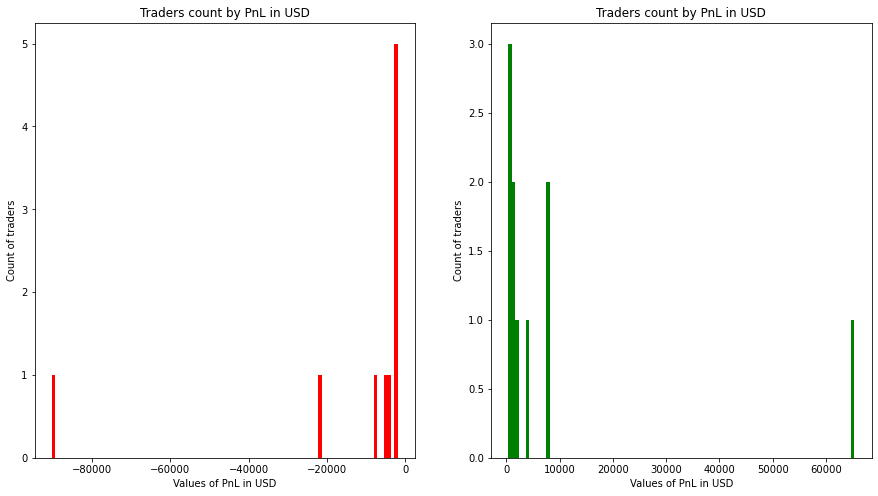

In [31]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_perp_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_perp_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

Here can be seen the same interesting moment as in the previous pool when range of negative values is much bigger and overall concentration of values is similar and may be close to form a "balance" between profits and losses, but in this case two outliers on the losses side cause great shift of the final PnL to the negative side.

In [32]:
perp_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vPERP"]
biggest_losser_perp_position_changes_df = perp_position_changes_df[perp_position_changes_df["trader"] == 
                                                             "0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_perp_position_changes_df["time"], biggest_losser_perp_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x3478d1ba5bc6c0e662dec109c70c0065dad5f5be over time in PERP pool")
ax.grid(True, linestyle='--')
plt.show()

### Top 10 Lossers

In [33]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_perp_position_changes_df.head(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

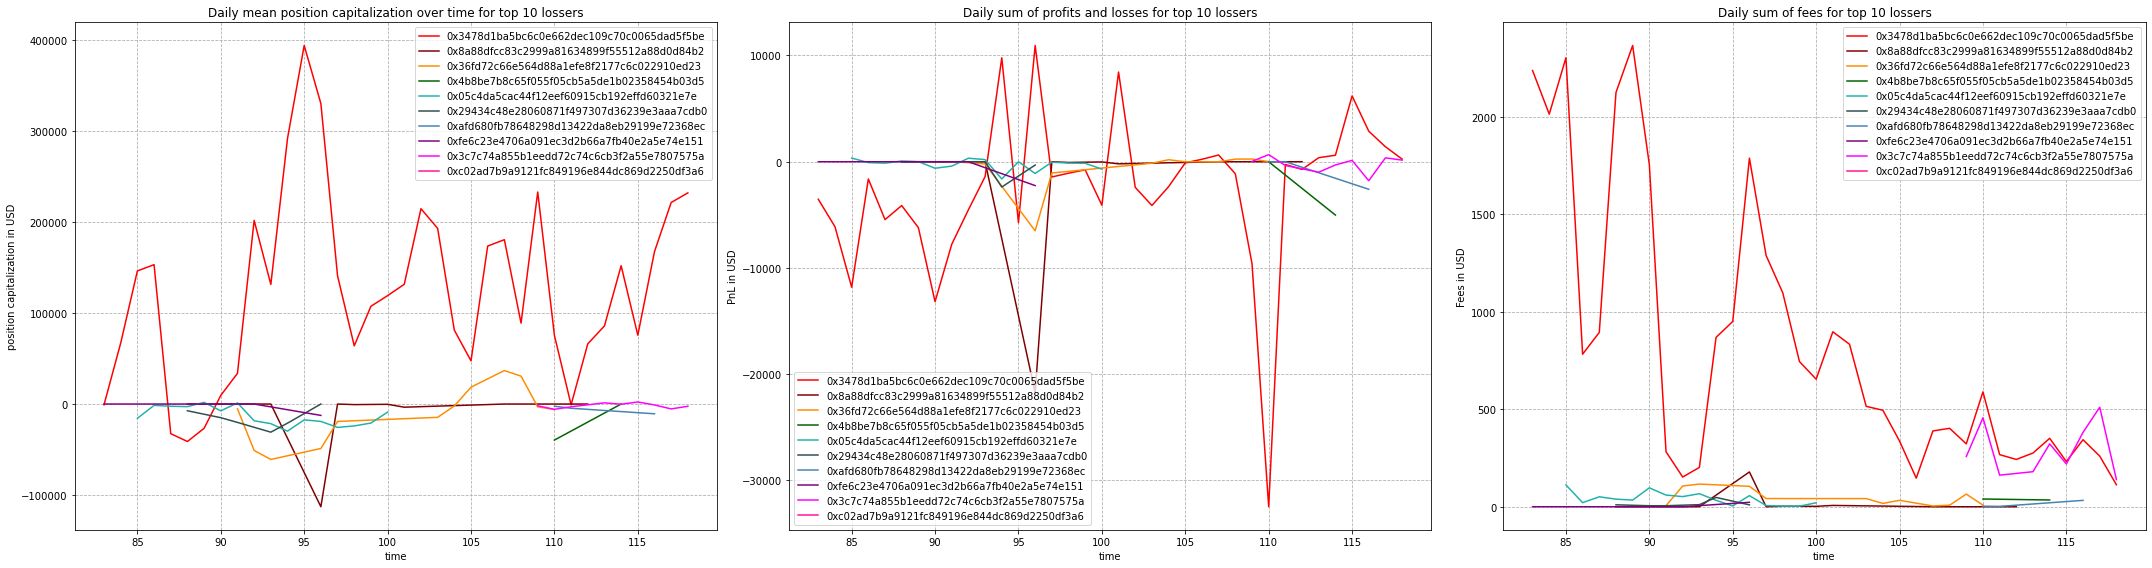

In [34]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_perp_position_changes_df.head(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_perp_position_changes_df.head(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_perp_position_changes_df.head(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Top 10 Profiters

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_perp_position_changes_df.tail(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

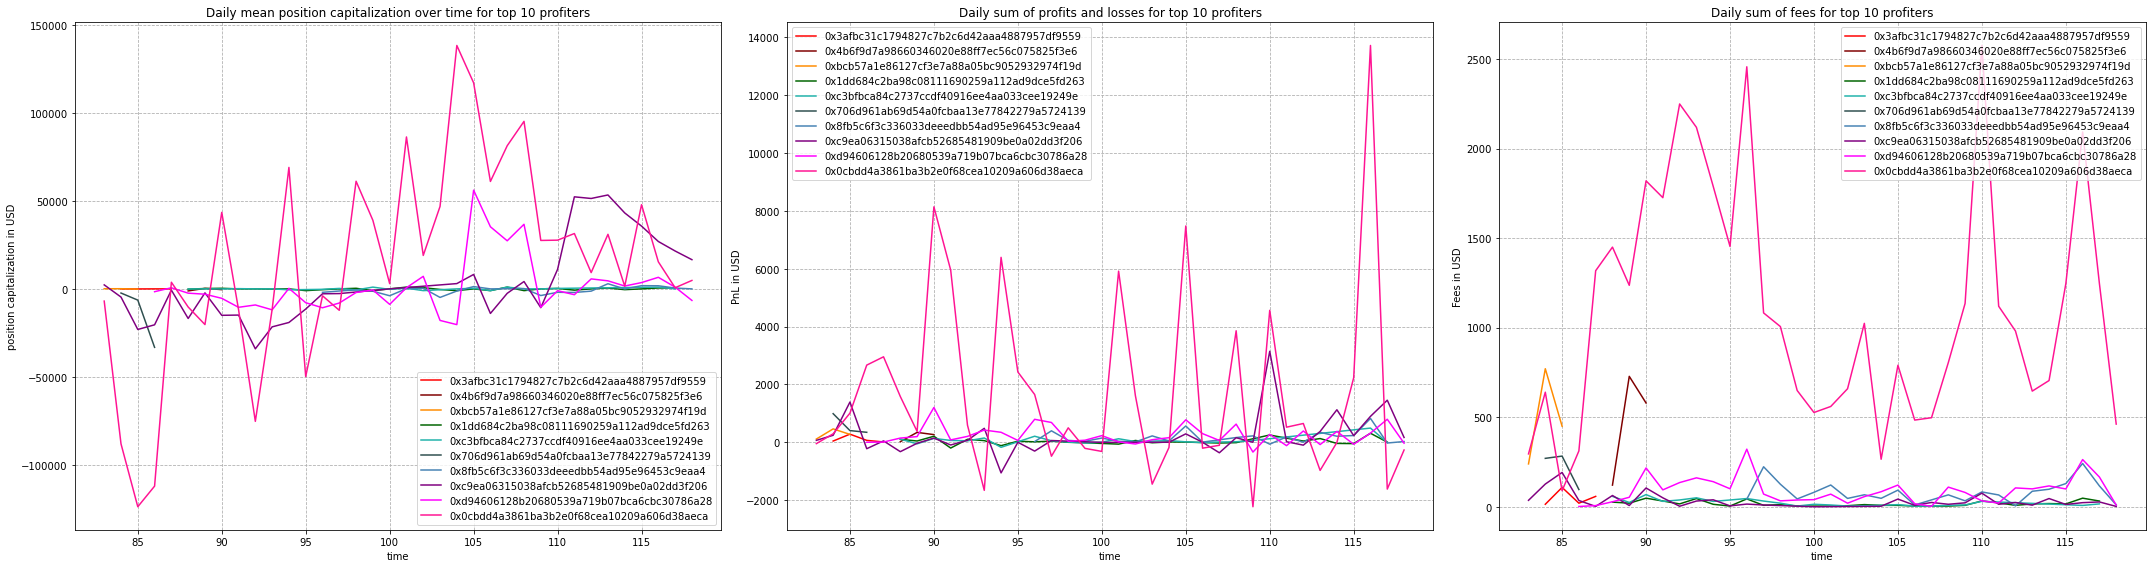

In [36]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_perp_position_changes_df.tail(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_perp_position_changes_df.tail(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_perp_position_changes_df.tail(10).index:
    traderwise_data_df = perp_position_changes_df[perp_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

## vMATIC

In [37]:
matic_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vMATIC"]
matic_position_changes_df

id  \
1352214  0x553527537fa831131d66594b5cfd1c018227162c82b4...   
1352217  0xd5609818311b0137318c7d41896b1105c6be9c04ee04...   
1352221  0x89d55d54f51332e201c8e9f8530d111a9ad80ce5a49f...   
1352228  0x2bcd593ce2cb9c9551eab8a78954d2896436ed63901c...   
1352231  0x3e1fe106bdc6aafffa5087cea2527e114b4f8ff6d51d...   
...                                                    ...   
1834790  0xfff233246ab784962d72c598c9238ce6e1497c1ffd5e...   
1834817  0xd3d75177abdbd7c4ea10d2204aa8297a353d11b009ad...   
1834832  0x1cf1454688a3690eb5c82698c499ef44bb07173c2221...   
1834841  0x5f081daec8760783fdfd65b151ac6eb81b7022be5b1c...   
1834861  0x978645e43b1779dae628ed4df8a0350803d161c8fef1...   

                                                   tx_hash  \
1352214  0x553527537fa831131d66594b5cfd1c018227162c82b4...   
1352217  0xd5609818311b0137318c7d41896b1105c6be9c04ee04...   
1352221  0x89d55d54f51332e201c8e9f8530d111a9ad80ce5a49f...   
1352228  0x2bcd593ce2cb9c9551eab8a78954d2896436ed63901c...   
1352231  0x3e1fe106bdc6aafffa5087cea2527e114b4f8ff6d51d...   
...                                                    ...   
1834790  0xfff233246ab784962d72c598c9238ce6e1497c1ffd5e...   
1834817  0xd3d75177abdbd7c4ea10d2204aa8297a353d11b009ad...   
1834832  0x1cf1454688a3690eb5c82698c499ef44bb07173c2221...   
1834841  0x5f081daec8760783fdfd65b151ac6eb81b7022be5b1c...   
1834861  0x978645e43b1779dae628ed4df8a0350803d161c8fef1...   

                                             trader  \
1352214  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1352217  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1352221  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1352228  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1352231  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
...                                             ...   
1834790  0x947705db2127dec51b8a9980650e3126137e52d1   
1834817  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   
1834832  0x9922c712eaef4abeadbe11dd903d6d1331666287   
1834841  0x947705db2127dec51b8a9980650e3126137e52d1   
1834861  0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226   

                                         base_token  exchanged_position_size  \
1352214  0xbe5de48197fc974600929196239e264ecb703ee8              2644.354528   
1352217  0xbe5de48197fc974600929196239e264ecb703ee8              1422.807330   
1352221  0xbe5de48197fc974600929196239e264ecb703ee8              1015.830296   
1352228  0xbe5de48197fc974600929196239e264ecb703ee8              1827.527924   
1352231  0xbe5de48197fc974600929196239e264ecb703ee8              1623.426810   
...                                             ...                      ...   
1834790  0xbe5de48197fc974600929196239e264ecb703ee8             -2351.000985   
1834817  0xbe5de48197fc974600929196239e264ecb703ee8              5940.758549   
1834832  0xbe5de48197fc974600929196239e264ecb703ee8             -2500.000000   
1834841  0xbe5de48197fc974600929196239e264ecb703ee8             -2354.001824   
1834861  0xbe5de48197fc974600929196239e264ecb703ee8              3371.136364   

         exchanged_position_notional       fee  open_notional  realized_pnl  \
1352214                 -3896.100000  3.900000   -3900.000000      0.000000   
1352217                 -2097.900000  2.100000   -6000.000000      0.000000   
1352221                 -1498.500000  1.500000   -7500.000000      0.000000   
1352228                 -2697.300000  2.700000  -10200.000000      0.000000   
1352231                 -2397.600000  2.400000  -12600.000000      0.000000   
...                              ...       ...            ...           ...   
1834790                  3000.236882  3.000237   34657.265722      0.000000   
1834817                 -7584.890461  0.000000   89900.458440    -66.797039   
1834832                  3188.303491  3.188303       0.000000     -1.366259   
1834841                  2999.749019  2.999749   37654.014992      0.000000   
1834861                 -4297.643387  0.000000   85634.249350    -31.434297

In [38]:
trader_matic_position_changes_df = matic_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_matic_open_notional_mean_df = matic_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_matic_position_changes_df["open_notional"] = daily_matic_open_notional_mean_df["open_notional"]
trader_matic_position_changes_df.sort_values("realized_pnl", inplace=True)
trader_matic_position_changes_df

fee  realized_pnl  \
trader                                                                   
0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226  11675.153021 -81479.979156   
0x0821da97a9f9e8993d44823d205fb4a91a565ce4    222.964697 -15258.267495   
0x706d961ab69d54a0fcbaa13e77842279a5724139     82.849512  -1137.881855   
0x11111aa553b6ffbf0ef158902531cc42c8a7f553     19.536610  -1010.869276   
0xfedb903e5a5150cf0a58d01148c5ad0ced8a5210     98.825636   -877.621783   
...                                                  ...           ...   
0x3205dbab7b8d704ed05bc72234178d61058c10ca   1741.905045   1234.794433   
0x906631082fd940e83412751b446e57109bae55ce    832.598615   1416.525945   
0x1a0af27d5e90ac60d78e308fd20aee1ef20a76a6    466.925219   2104.523423   
0x338d8dd42d9c680ac8e4b9041bb215670e40849f    510.969941   2662.752610   
0x947705db2127dec51b8a9980650e3126137e52d1  43480.609814  38993.013329   

                                            open_notional  
trader                                                     
0xd8bcd1e2f0e96a3402fd678b0b2eaceb80e1c226    4458.363893  
0x0821da97a9f9e8993d44823d205fb4a91a565ce4  -68191.964286  
0x706d961ab69d54a0fcbaa13e77842279a5724139   26629.095912  
0x11111aa553b6ffbf0ef158902531cc42c8a7f553  -10263.971163  
0xfedb903e5a5150cf0a58d01148c5ad0ced8a5210   10078.969800  
...                                                   ...  
0x3205dbab7b8d704ed05bc72234178d61058c10ca   10198.328385  
0x906631082fd940e83412751b446e57109bae55ce    6934.297874  
0x1a0af27d5e90ac60d78e308fd20aee1ef20a76a6    4660.965567  
0x338d8dd42d9c680ac8e4b9041bb215670e40849f    3004.018221  
0x947705db2127dec51b8a9980650e3126137e52d1   62976.079239  

[156 rows x 3 columns]

In [39]:
print("sum of entire trading PnL = " + str(trader_matic_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_matic_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_matic_position_changes_df[trader_matic_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_matic_position_changes_df[trader_matic_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -55053.41733428264
sum of fees = 63411.11651077656
count of profiters = 26
count of persons with losses = 130


In [40]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_matic_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_matic_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

Here can be seen the same interesting moment as in the previous pool when range of negative values is much bigger and overall concentration of values is similar and may be close to form a "balance" between profits and losses, but in this case two outliers on the losses side cause great shift of the final PnL to the negative side.

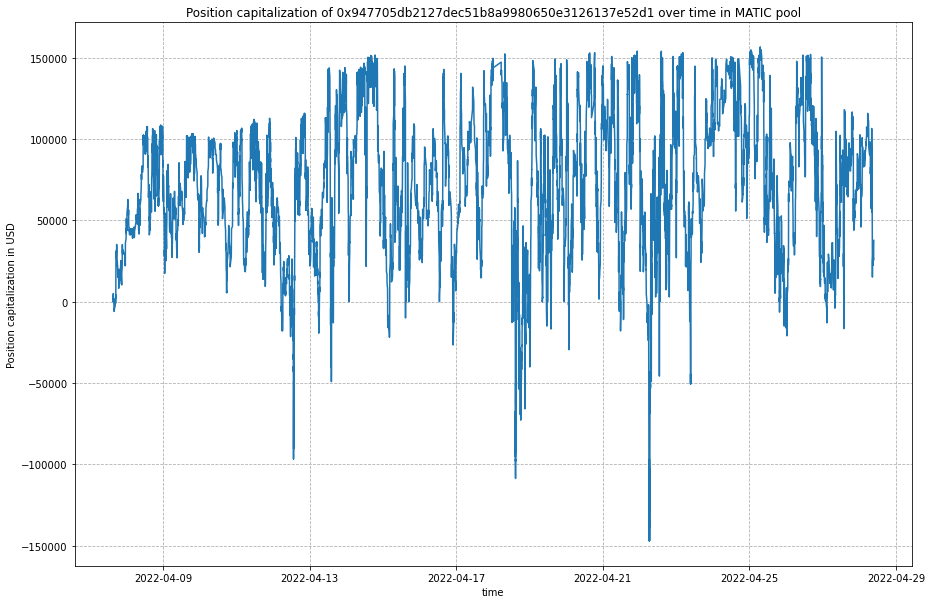

In [41]:
matic_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vMATIC"]
biggest_losser_matic_position_changes_df = matic_position_changes_df[matic_position_changes_df["trader"] == 
                                                             "0x947705db2127dec51b8a9980650e3126137e52d1"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_matic_position_changes_df["time"], biggest_losser_matic_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x947705db2127dec51b8a9980650e3126137e52d1 over time in MATIC pool")
ax.grid(True, linestyle='--')
plt.show()

### Top 10 Lossers

In [42]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_matic_position_changes_df.head(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

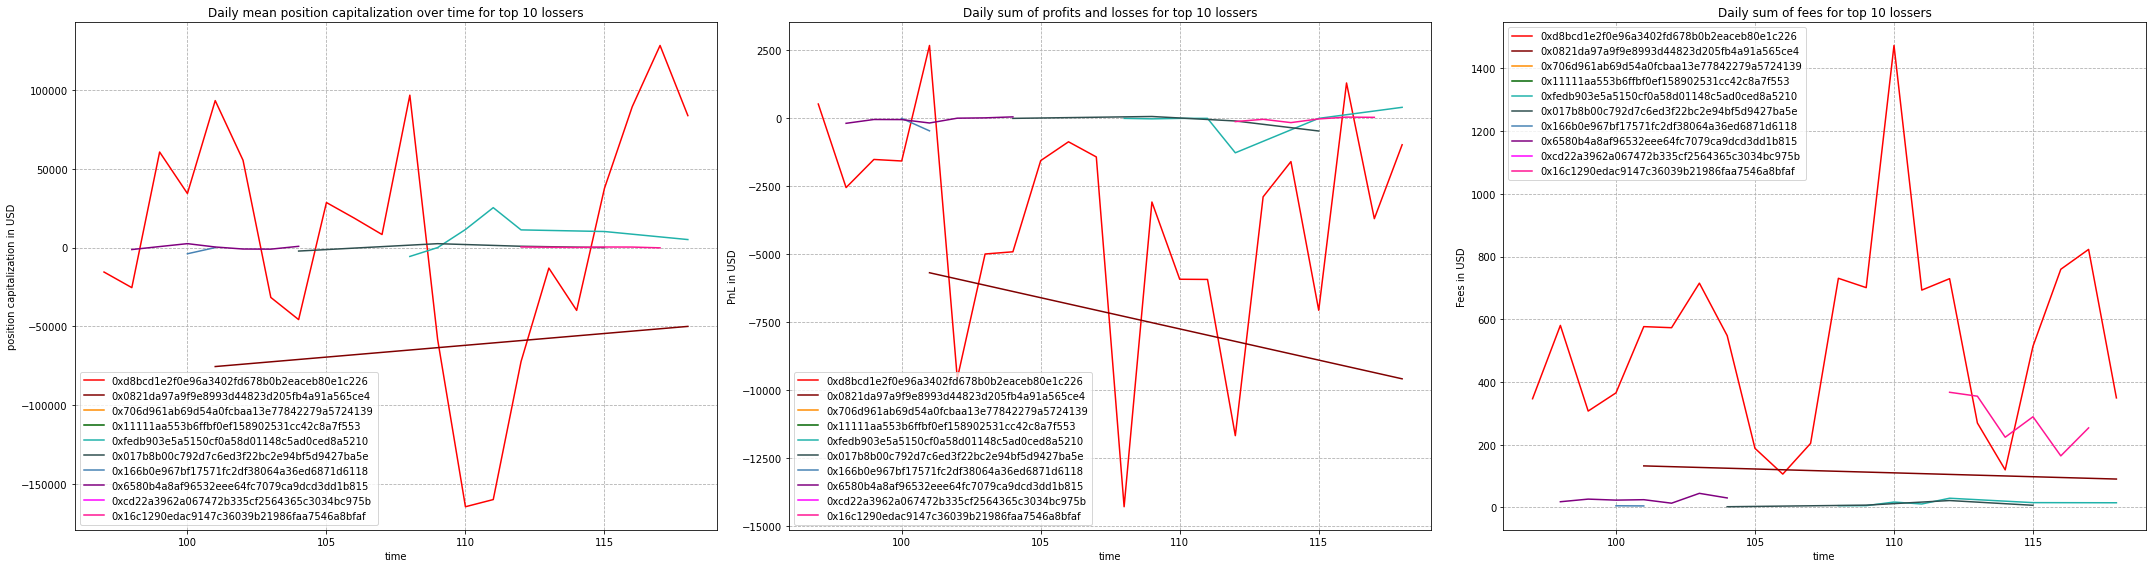

In [43]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_matic_position_changes_df.head(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_matic_position_changes_df.head(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_matic_position_changes_df.head(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Top 10 Profiters

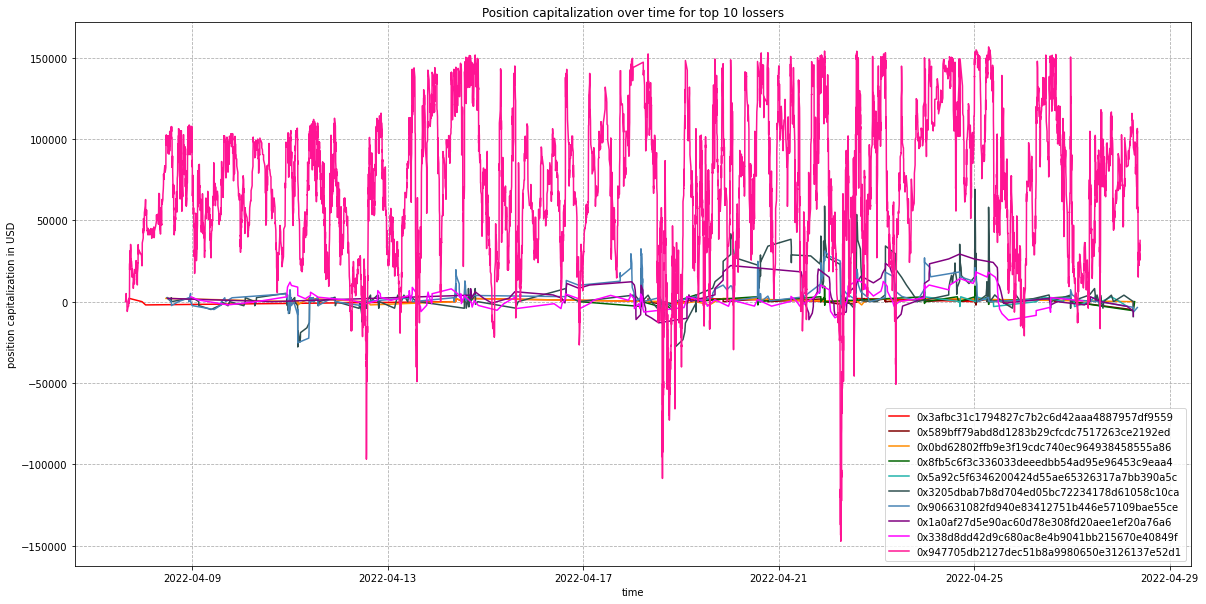

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_matic_position_changes_df.tail(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

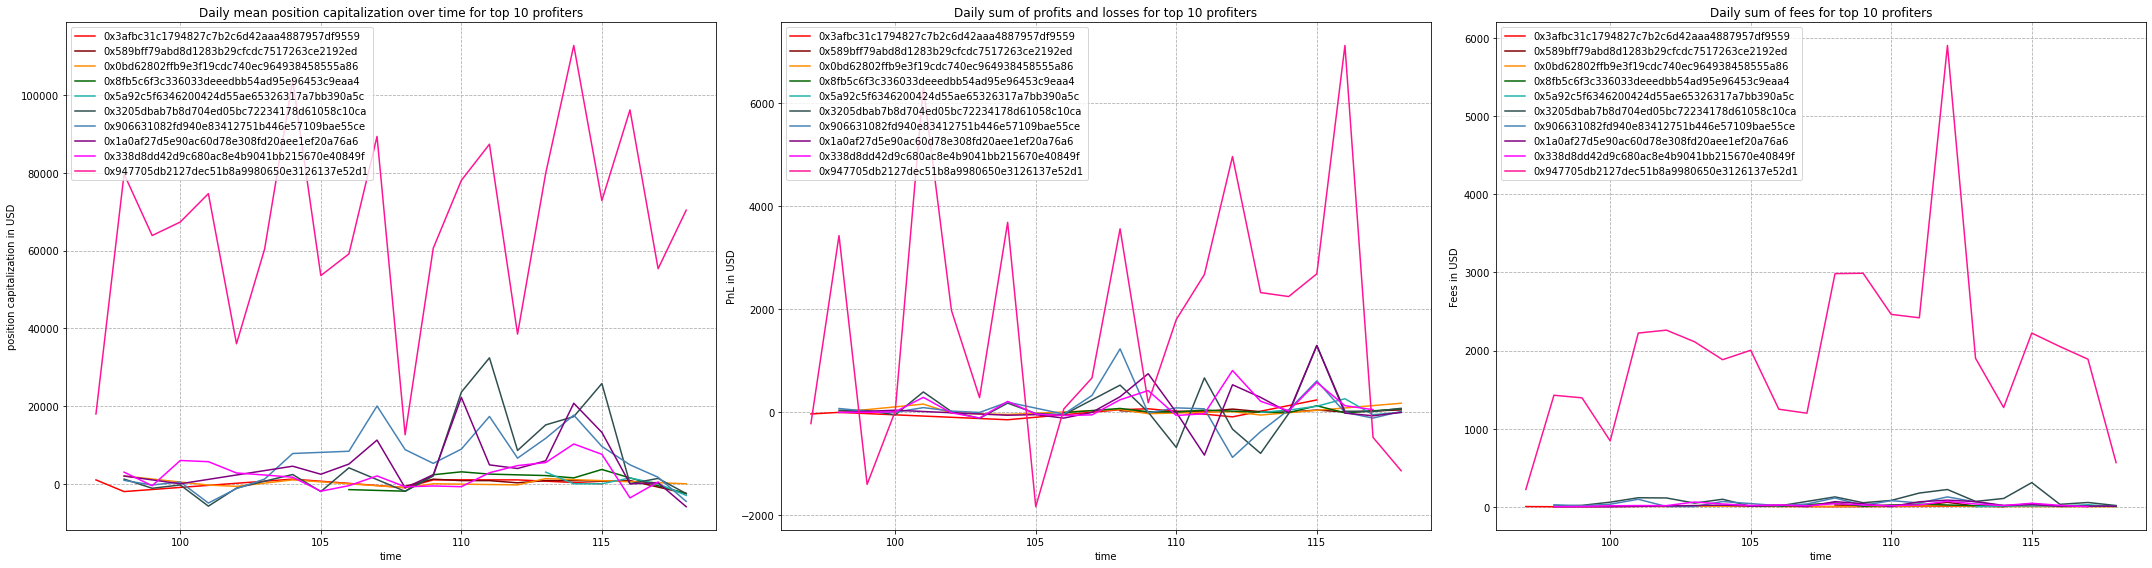

In [45]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_matic_position_changes_df.tail(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_matic_position_changes_df.tail(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_matic_position_changes_df.tail(10).index:
    traderwise_data_df = matic_position_changes_df[matic_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

## vLUNA

In [46]:
luna_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vLUNA"]
luna_position_changes_df

id  \
71098    0xa8b45e7245e54b9211b2f7da39046d4846485e47a755...   
71100    0xb881aa81885c8f4ce4afe158f857927aabde6721fdef...   
71103    0xf3a59c45e4ddc81582d4d3cb29773b8995fe12dd93ed...   
71107    0x2fca194cfae4120ca75d7bbf09dc97d7e17d24630c75...   
71110    0x205a5334daeb473255f6fd9ea58f97a956d1d7bdd6cd...   
...                                                    ...   
1834826  0x8c32cd8fdce1af8568f6f1a4cbd0712522d0cb54c4e9...   
1834831  0x0a7aa13b0a1d388f5ee6fa5ab8558eee7ae90eb4866b...   
1834833  0x1f04fffe457572bc7d05d64f1887a50e676a5600614a...   
1834835  0x67a22677a7631105a6d82e7268398d8b1403d7c8937c...   
1834858  0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...   

                                                   tx_hash  \
71098    0xa8b45e7245e54b9211b2f7da39046d4846485e47a755...   
71100    0xb881aa81885c8f4ce4afe158f857927aabde6721fdef...   
71103    0xf3a59c45e4ddc81582d4d3cb29773b8995fe12dd93ed...   
71107    0x2fca194cfae4120ca75d7bbf09dc97d7e17d24630c75...   
71110    0x205a5334daeb473255f6fd9ea58f97a956d1d7bdd6cd...   
...                                                    ...   
1834826  0x8c32cd8fdce1af8568f6f1a4cbd0712522d0cb54c4e9...   
1834831  0x0a7aa13b0a1d388f5ee6fa5ab8558eee7ae90eb4866b...   
1834833  0x1f04fffe457572bc7d05d64f1887a50e676a5600614a...   
1834835  0x67a22677a7631105a6d82e7268398d8b1403d7c8937c...   
1834858  0xd91c7e2a87ab9380062386239788915e4f1c5a052fc8...   

                                             trader  \
71098    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
71100    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
71103    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
71107    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
71110    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
...                                             ...   
1834826  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   
1834831  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   
1834833  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   
1834835  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   
1834858  0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   

                                         base_token  exchanged_position_size  \
71098    0xb24f50dd9918934ab2228be7a097411ca28f6c14              -371.959305   
71100    0xb24f50dd9918934ab2228be7a097411ca28f6c14              -365.183383   
71103    0xb24f50dd9918934ab2228be7a097411ca28f6c14               371.216452   
71107    0xb24f50dd9918934ab2228be7a097411ca28f6c14               382.660632   
71110    0xb24f50dd9918934ab2228be7a097411ca28f6c14               357.696867   
...                                             ...                      ...   
1834826  0xb24f50dd9918934ab2228be7a097411ca28f6c14                -6.000005   
1834831  0xb24f50dd9918934ab2228be7a097411ca28f6c14                -5.975164   
1834833  0xb24f50dd9918934ab2228be7a097411ca28f6c14               -33.034505   
1834835  0xb24f50dd9918934ab2228be7a097411ca28f6c14               -27.024797   
1834858  0xb24f50dd9918934ab2228be7a097411ca28f6c14               -32.999902   

         exchanged_position_notional        fee  open_notional  realized_pnl  \
71098                   30530.530531  30.530531   60500.000000      0.000000   
71100                   30030.030030  30.030030   30000.000000      0.000000   
71103                  -30469.500000  30.500000   30032.906281    -32.906281   
71107                  -31468.500000  31.500000   -1377.548229    -89.545490   
71110                  -29470.500000  29.500000  -30877.548229      0.000000   
...                              ...        ...            ...           ...   
1834826                   551.288975   0.551289  -24055.566565     -0.163063   
1834831                   548.426841   0.548427  -21025.618768     -0.741451   
1834833                  3030.161563   3.030162  -17992.499228     -5.988139   
1834835                  2481.764831   2.481765  -21574.238633     -2.044866   
1834858                  3023.793838   3.023794  -14962.556823  

In [47]:
trader_luna_position_changes_df = luna_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_luna_open_notional_mean_df = luna_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_luna_position_changes_df["open_notional"] = daily_luna_open_notional_mean_df["open_notional"]
trader_luna_position_changes_df.sort_values("realized_pnl", inplace=True)
trader_luna_position_changes_df

fee   realized_pnl  \
trader                                                                     
0xf8489bcef22d3282bb884b9e9cc708bb465c075e  151122.526797 -442762.926606   
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   77903.127145 -424805.609994   
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   22876.596697  -70717.119029   
0x749e882a0f35534789b76f0bcc957c2b992e94d7     112.529219  -29268.318275   
0x0aaf38602f6f5778ddd5f4781592b9574d5fbb7e     245.467877  -29157.710498   
...                                                   ...            ...   
0xfd7b219f946087dd75fbf3630bc674f347dafeee   13200.664071   19359.233006   
0x8c62b7696b09d7811e84a691baa6aec72ab7bb18    3197.311562   29284.473229   
0x6541e4d0f50a82544401b1e0721626415a37de99   25702.318049   52522.133473   
0xbca93564bbf750e7b81ee1506009c7d86c6a4a45  372660.058901   89988.159317   
0x8a7cd6f15877a49f91189d311f026eb929228448   35173.618382   93404.472906   

                                            open_notional  
trader                                                     
0xf8489bcef22d3282bb884b9e9cc708bb465c075e  -58719.456960  
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7  239077.053782  
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   19041.556767  
0x749e882a0f35534789b76f0bcc957c2b992e94d7   25085.044678  
0x0aaf38602f6f5778ddd5f4781592b9574d5fbb7e   55159.882428  
...                                                   ...  
0xfd7b219f946087dd75fbf3630bc674f347dafeee   -1941.033469  
0x8c62b7696b09d7811e84a691baa6aec72ab7bb18   56401.476460  
0x6541e4d0f50a82544401b1e0721626415a37de99   -3546.116005  
0xbca93564bbf750e7b81ee1506009c7d86c6a4a45   51308.150880  
0x8a7cd6f15877a49f91189d311f026eb929228448   12062.161542  

[364 rows x 3 columns]

In [48]:
print("sum of entire trading PnL = " + str(trader_luna_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_luna_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_luna_position_changes_df[trader_luna_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_luna_position_changes_df[trader_luna_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -832146.7802226656
sum of fees = 876567.1229917684
count of profiters = 124
count of persons with losses = 240


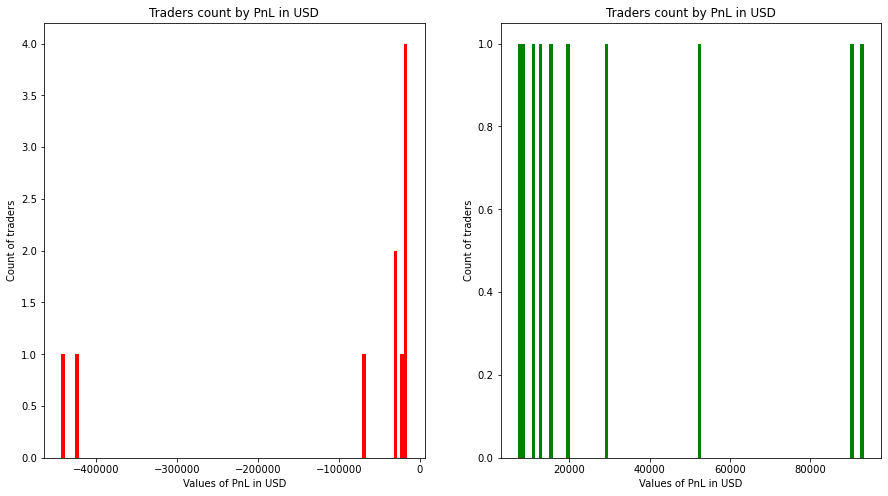

In [49]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_luna_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_luna_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

Here can be seen the same interesting moment as in the previous pool when range of negative values is much bigger and overall concentration of values is similar and may be close to form a "balance" between profits and losses, but in this case two outliers on the losses side cause great shift of the final PnL to the negative side.

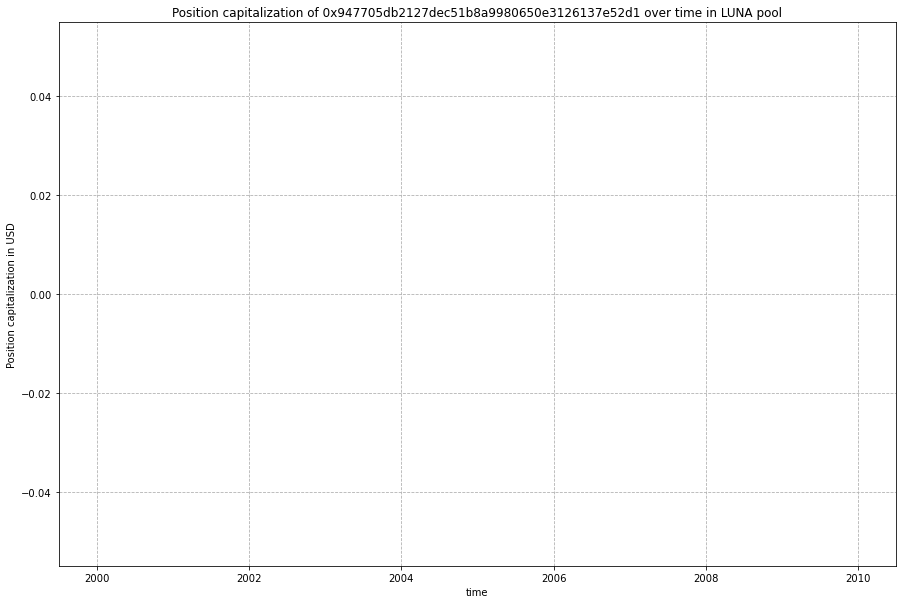

In [50]:
luna_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vLUNA"]
biggest_losser_luna_position_changes_df = luna_position_changes_df[luna_position_changes_df["trader"] == 
                                                             "0x947705db2127dec51b8a9980650e3126137e52d1"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_luna_position_changes_df["time"], biggest_losser_luna_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x947705db2127dec51b8a9980650e3126137e52d1 over time in LUNA pool")
ax.grid(True, linestyle='--')
plt.show()

### Top 10 Lossers

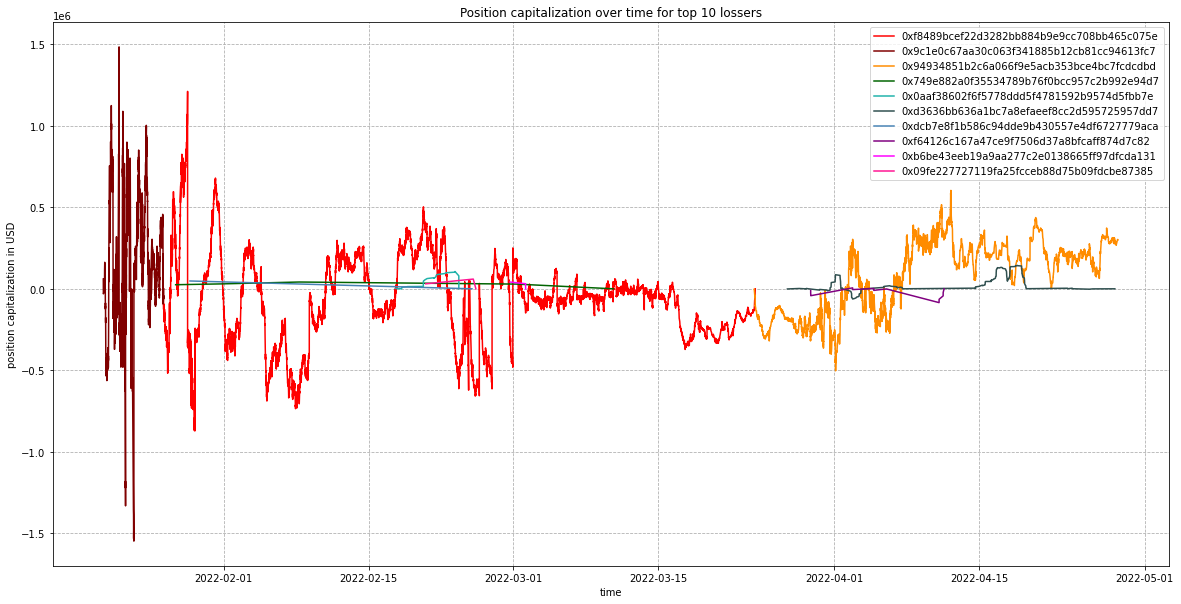

In [51]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_luna_position_changes_df.head(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

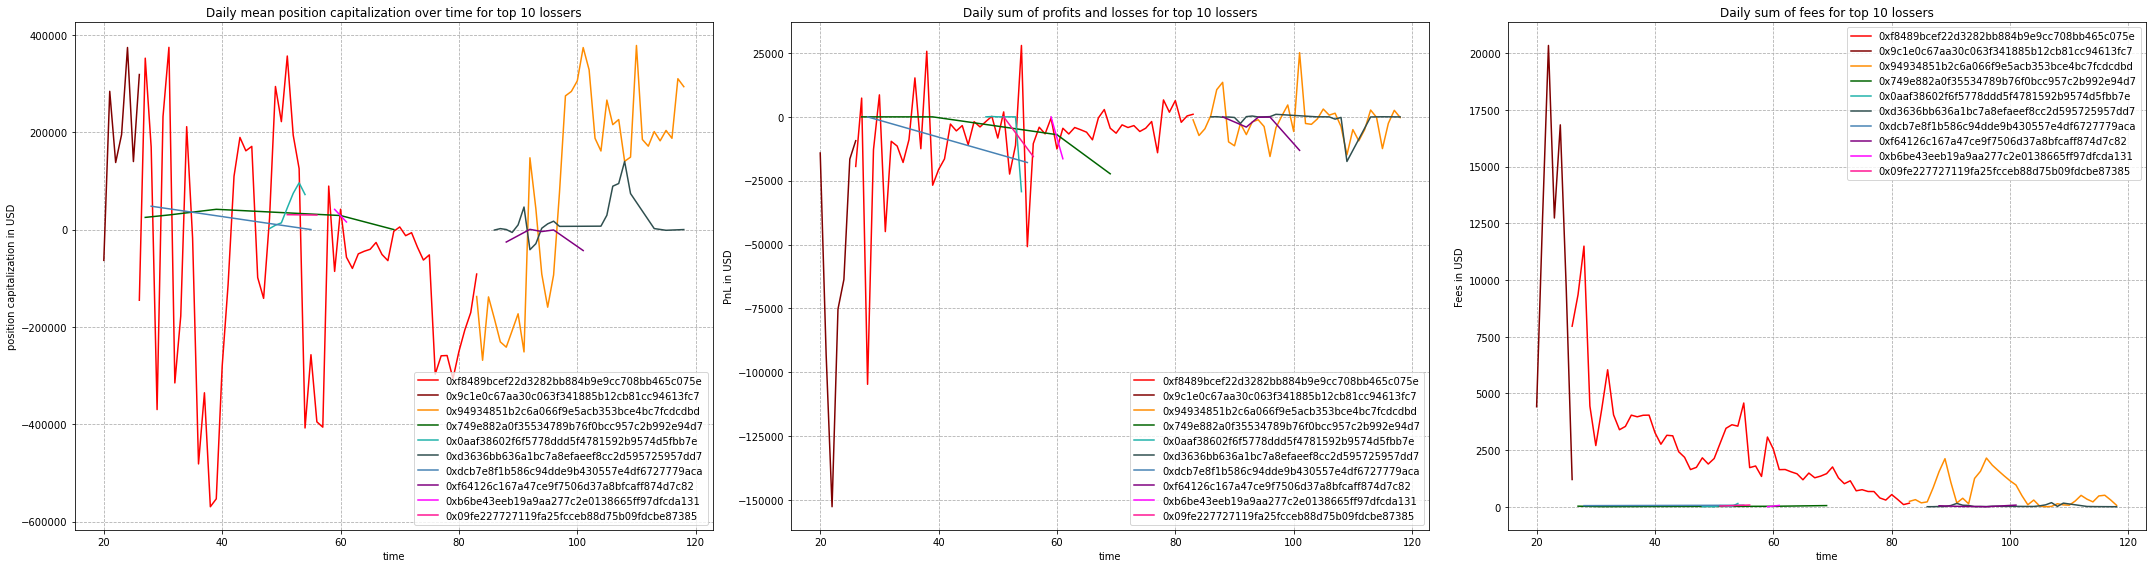

In [52]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_luna_position_changes_df.head(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_luna_position_changes_df.head(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_luna_position_changes_df.head(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Top 10 Profiters

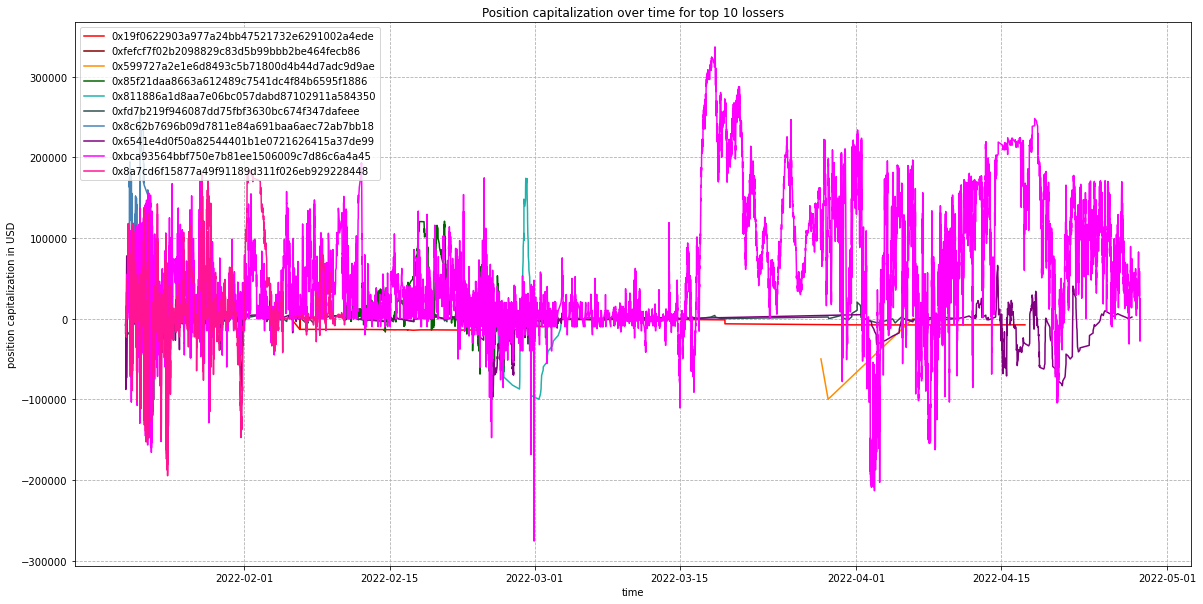

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_luna_position_changes_df.tail(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

In [54]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_luna_position_changes_df.tail(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_luna_position_changes_df.tail(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_luna_position_changes_df.tail(10).index:
    traderwise_data_df = luna_position_changes_df[luna_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

## vAVAX

In [55]:
avax_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vAVAX"]
avax_position_changes_df

id  \
66544    0x1b63b787e8c18cd6e1a37ad25a9a588919ff6fb78b7c...   
66557    0x7b2221c45357bab23a17d997d7301b69adbfe36c9740...   
66560    0x170dc2e2c1880f102cff371c98c2d6709e710e6fddd2...   
66571    0x1a53c844740ba9aca64f431066d5fccfb4d0acb9973a...   
66572    0x404b4638966a5d60bd52a45118e1325db0a27e377596...   
...                                                    ...   
1834771  0x987ab7e5e4cbc0486d897e9d8bad2493e62d223af54e...   
1834778  0xd33461c0cf05997dbe07a1c04a6c97a80e902cb203a8...   
1834818  0xd5af2faba7dd991102992c5811f639c58b0efedbdf12...   
1834849  0x24d076d15a8c61ad6a1322c3ddfb5580489d8c4e04f5...   
1834862  0xc3498429c7f1a0dc7049021032e86cdcc673b9e81c3b...   

                                                   tx_hash  \
66544    0x1b63b787e8c18cd6e1a37ad25a9a588919ff6fb78b7c...   
66557    0x7b2221c45357bab23a17d997d7301b69adbfe36c9740...   
66560    0x170dc2e2c1880f102cff371c98c2d6709e710e6fddd2...   
66571    0x1a53c844740ba9aca64f431066d5fccfb4d0acb9973a...   
66572    0x404b4638966a5d60bd52a45118e1325db0a27e377596...   
...                                                    ...   
1834771  0x987ab7e5e4cbc0486d897e9d8bad2493e62d223af54e...   
1834778  0xd33461c0cf05997dbe07a1c04a6c97a80e902cb203a8...   
1834818  0xd5af2faba7dd991102992c5811f639c58b0efedbdf12...   
1834849  0x24d076d15a8c61ad6a1322c3ddfb5580489d8c4e04f5...   
1834862  0xc3498429c7f1a0dc7049021032e86cdcc673b9e81c3b...   

                                             trader  \
66544    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
66557    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
66560    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
66571    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
66572    0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   
...                                             ...   
1834771  0x66465ad392942e78f8147ae565a43f174071822b   
1834778  0x72f059151a3cc80818e768556c8b1866fbf455fe   
1834818  0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   
1834849  0x72f059151a3cc80818e768556c8b1866fbf455fe   
1834862  0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   

                                         base_token  exchanged_position_size  \
66544    0x5faa136fc58b6136ffdaeaac320076c4865c070f              -243.905594   
66557    0x5faa136fc58b6136ffdaeaac320076c4865c070f              -314.050112   
66560    0x5faa136fc58b6136ffdaeaac320076c4865c070f               348.215959   
66571    0x5faa136fc58b6136ffdaeaac320076c4865c070f              -279.080397   
66572    0x5faa136fc58b6136ffdaeaac320076c4865c070f               377.069386   
...                                             ...                      ...   
1834771  0x5faa136fc58b6136ffdaeaac320076c4865c070f               -42.000057   
1834778  0x5faa136fc58b6136ffdaeaac320076c4865c070f               -38.000000   
1834818  0x5faa136fc58b6136ffdaeaac320076c4865c070f                72.021572   
1834849  0x5faa136fc58b6136ffdaeaac320076c4865c070f               -38.000000   
1834862  0x5faa136fc58b6136ffdaeaac320076c4865c070f                10.388006   

         exchanged_position_notional        fee  open_notional  realized_pnl  \
66544                   21021.021021  21.021021   21000.000000      0.000000   
66557                   27027.027027  27.027027   48000.000000      0.000000   
66560                  -29970.000000  30.000000   18043.561133    -43.561133   
66571                   24024.024024  24.024024   42043.561133      0.000000   
66572                  -32467.500000  32.500000    9611.714897    -68.153764   
...                              ...        ...            ...           ...   
1834771                  2966.596481   2.966596   74106.979828      0.000000   
1834778                  2682.358918   2.682359       0.000000     -3.501848   
1834818                 -5087.271725   0.000000  244036.674303    -43.307651   
1834849                  2680.119986   2.680120    2677.439866      0.000000   
1834862                  -732.660585   0.000000  243309.159938  

In [56]:
trader_avax_position_changes_df = avax_position_changes_df[["trader", "fee", "realized_pnl"]].groupby("trader").sum()
daily_avax_open_notional_mean_df = avax_position_changes_df[["trader", "open_notional"]].groupby("trader").mean()
trader_avax_position_changes_df["open_notional"] = daily_avax_open_notional_mean_df["open_notional"]
trader_avax_position_changes_df.sort_values("realized_pnl", inplace=True)
trader_avax_position_changes_df

fee   realized_pnl  \
trader                                                                     
0xf8489bcef22d3282bb884b9e9cc708bb465c075e  182968.031843 -558391.948160   
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7   86479.274379 -384350.345017   
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   30970.139339 -122167.220560   
0x85f21daa8663a612489c7541dc4f84b6595f1886    8110.032532  -14460.461711   
0xaaeb47b8e363a0f548377b7fc959b28722057b40     197.374318  -12521.557152   
...                                                   ...            ...   
0x8c62b7696b09d7811e84a691baa6aec72ab7bb18    4181.788720   28764.454104   
0x445995c7a6560e2ac9a194e6658d103110f2d4d7   15071.438276   32322.985188   
0x8a7cd6f15877a49f91189d311f026eb929228448   19269.520440   40126.789168   
0x475260834a8bbc65a7b2f057e768ab379d825d3e    3441.349920   48988.873148   
0x66465ad392942e78f8147ae565a43f174071822b  312801.225592   84918.501276   

                                            open_notional  
trader                                                     
0xf8489bcef22d3282bb884b9e9cc708bb465c075e  230711.338035  
0x9c1e0c67aa30c063f341885b12cb81cc94613fc7 -106363.618612  
0x94934851b2c6a066f9e5acb353bce4bc7fcdcdbd   -6395.727267  
0x85f21daa8663a612489c7541dc4f84b6595f1886    1794.443127  
0xaaeb47b8e363a0f548377b7fc959b28722057b40  -15791.532217  
...                                                   ...  
0x8c62b7696b09d7811e84a691baa6aec72ab7bb18  173940.260607  
0x445995c7a6560e2ac9a194e6658d103110f2d4d7    5440.506748  
0x8a7cd6f15877a49f91189d311f026eb929228448    9085.489773  
0x475260834a8bbc65a7b2f057e768ab379d825d3e -101633.377263  
0x66465ad392942e78f8147ae565a43f174071822b   51123.910397  

[466 rows x 3 columns]

In [57]:
print("sum of entire trading PnL = " + str(trader_avax_position_changes_df["realized_pnl"].sum()))
print("sum of fees = " + str(trader_avax_position_changes_df["fee"].sum()))
print("count of profiters = " + str(len(
    trader_avax_position_changes_df[trader_avax_position_changes_df["realized_pnl"] > 0])))
print("count of persons with losses = " + str(len(
    trader_avax_position_changes_df[trader_avax_position_changes_df["realized_pnl"] <= 0])))

sum of entire trading PnL = -807460.6321484022
sum of fees = 904188.5709702899
count of profiters = 151
count of persons with losses = 315


In [58]:
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(1, 2, 1)
ax.hist(trader_avax_position_changes_df.head(10)["realized_pnl"], bins=100, color='r')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

ax = fig.add_subplot(1, 2, 2)
ax.hist(trader_avax_position_changes_df.tail(10)["realized_pnl"], bins=100, color='g')
ax.set_xlabel("Values of PnL in USD")
ax.set_ylabel("Count of traders")
ax.set_title("Traders count by PnL in USD")

plt.show()

Here can be seen the same interesting moment as in the previous pool when range of negative values is much bigger and overall concentration of values is similar and may be close to form a "balance" between profits and losses, but in this case two outliers on the losses side cause great shift of the final PnL to the negative side.

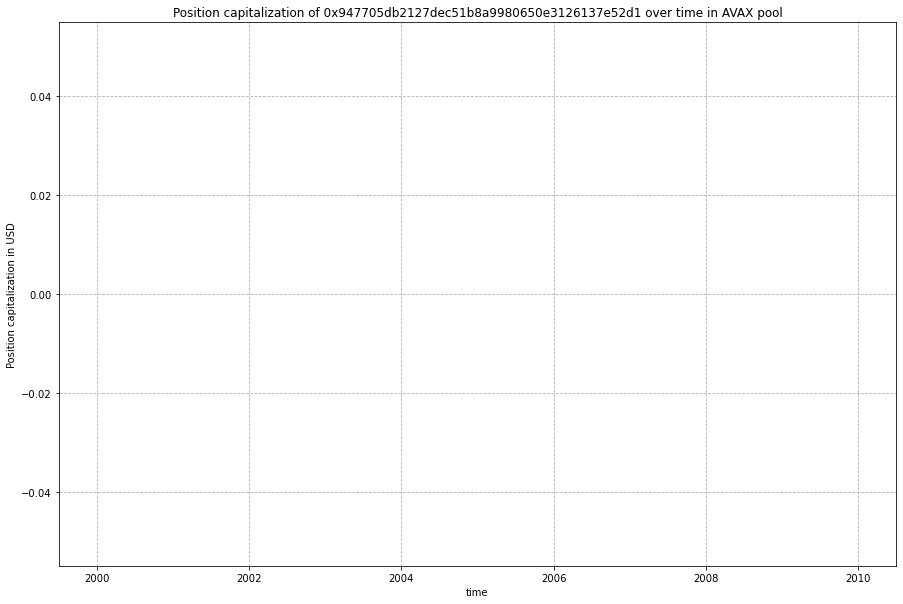

In [59]:
avax_position_changes_df = position_changes_df[position_changes_df["pool_name"] == "vAVAX"]
biggest_losser_avax_position_changes_df = avax_position_changes_df[avax_position_changes_df["trader"] == 
                                                             "0x947705db2127dec51b8a9980650e3126137e52d1"]

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(biggest_losser_avax_position_changes_df["time"], biggest_losser_avax_position_changes_df["open_notional"])
ax.set_xlabel("time")
ax.set_ylabel("Position capitalization in USD")
ax.set_title("Position capitalization of 0x947705db2127dec51b8a9980650e3126137e52d1 over time in AVAX pool")
ax.grid(True, linestyle='--')
plt.show()

### Top 10 Lossers

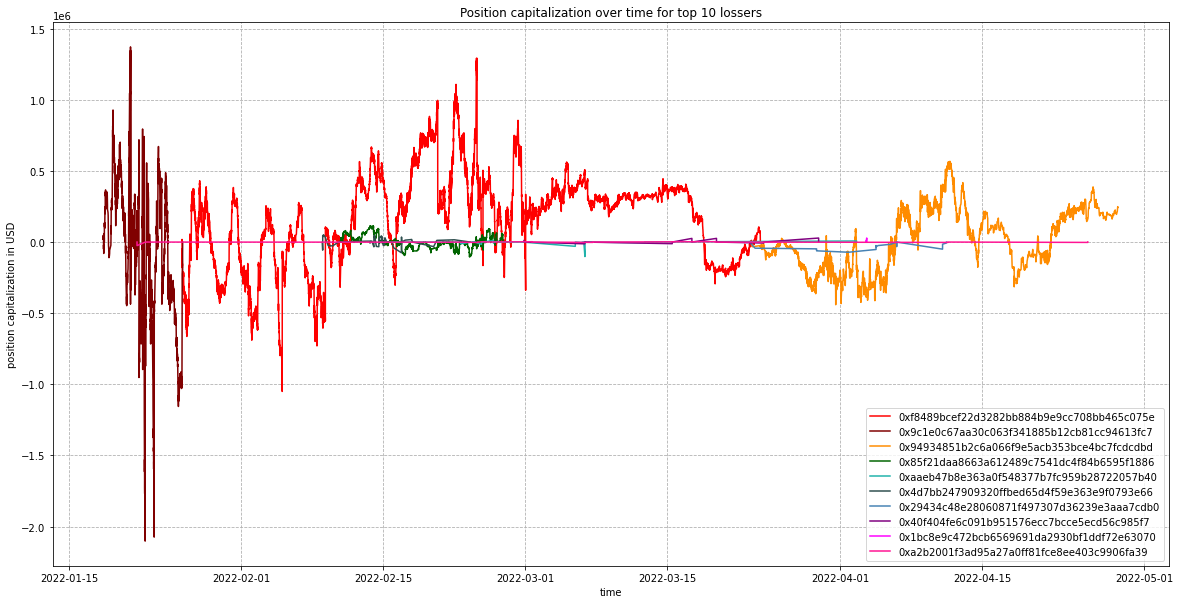

In [60]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_avax_position_changes_df.head(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

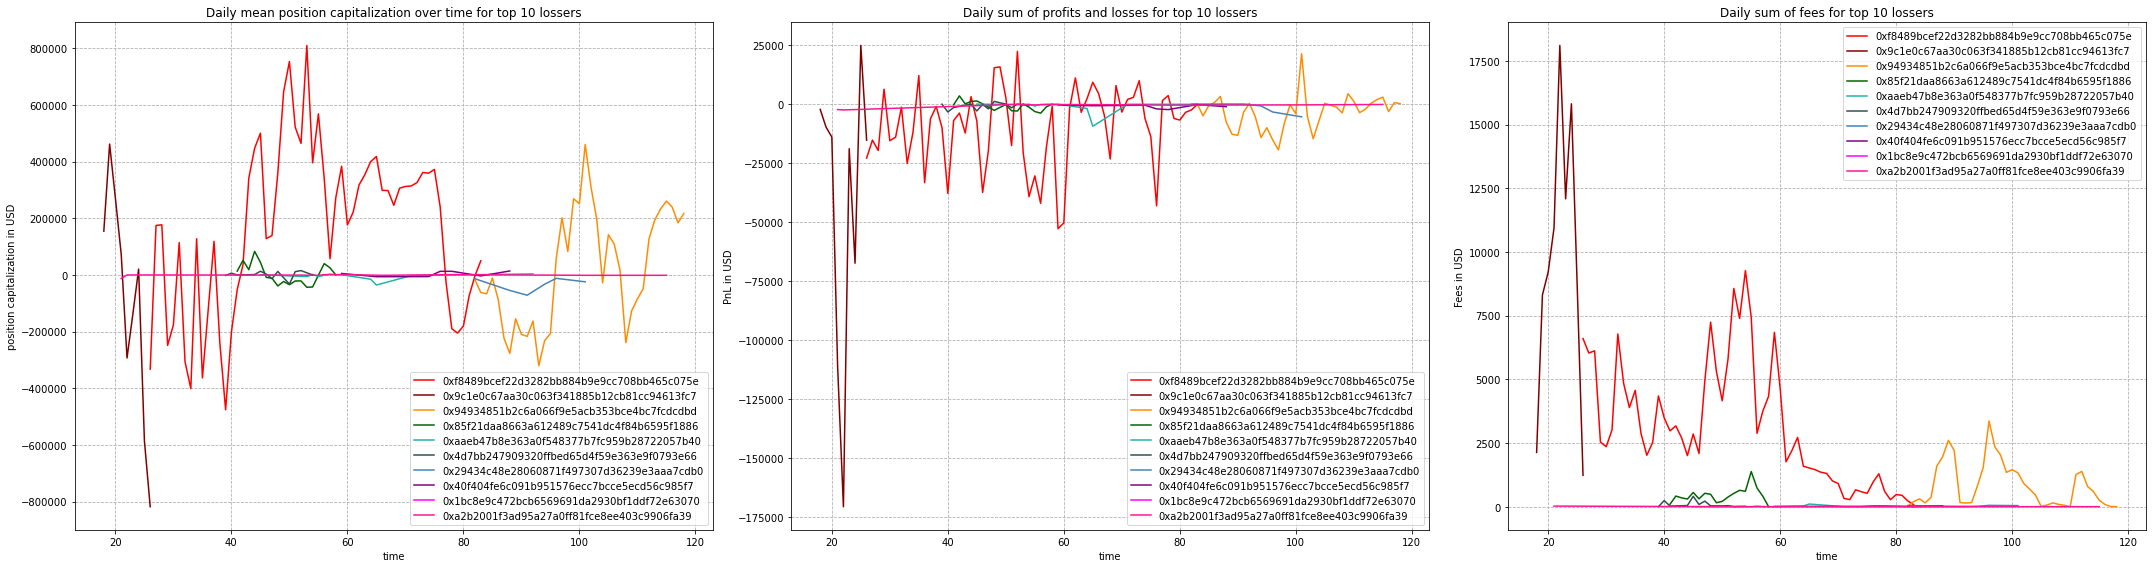

In [61]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_avax_position_changes_df.head(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_avax_position_changes_df.head(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_avax_position_changes_df.head(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 lossers")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

### Top 10 Profiters

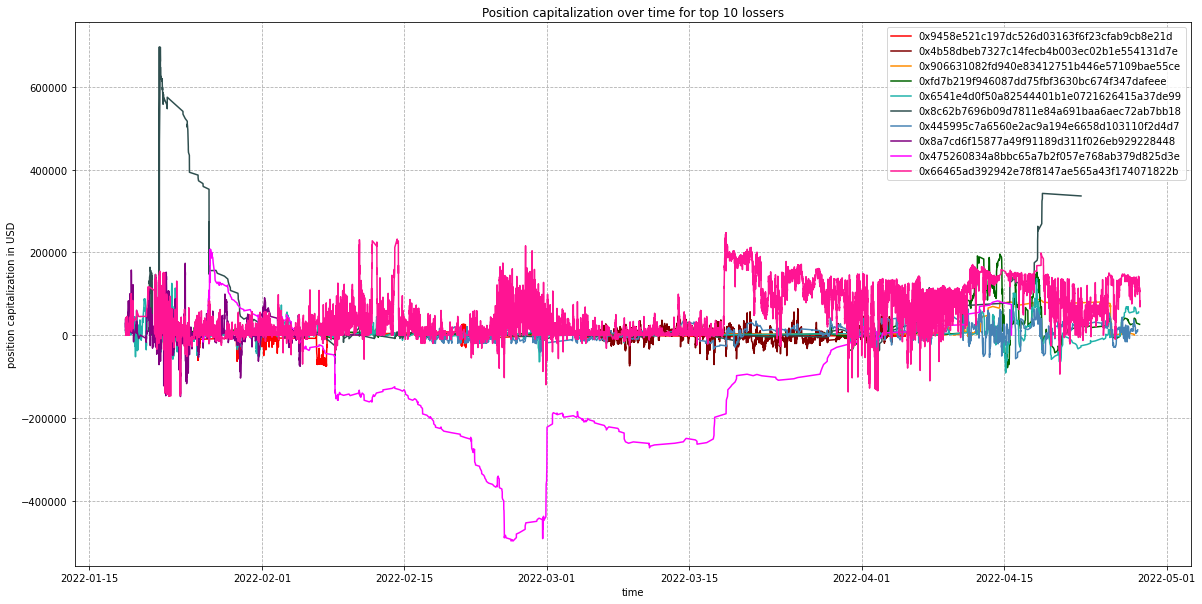

In [62]:
fig, ax = plt.subplots(figsize=(20, 10))
index = 0

for trader in trader_avax_position_changes_df.tail(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    ax.plot(traderwise_data_df["time"],
            traderwise_data_df["open_notional"],
            color=colors[index], label=trader)
    index += 1
    
ax.set_xlabel("time")
ax.set_ylabel("position capitalization in USD")
ax.set_title("Position capitalization over time for top 10 lossers")
ax.legend()
ax.grid(True, linestyle='--')
plt.show()

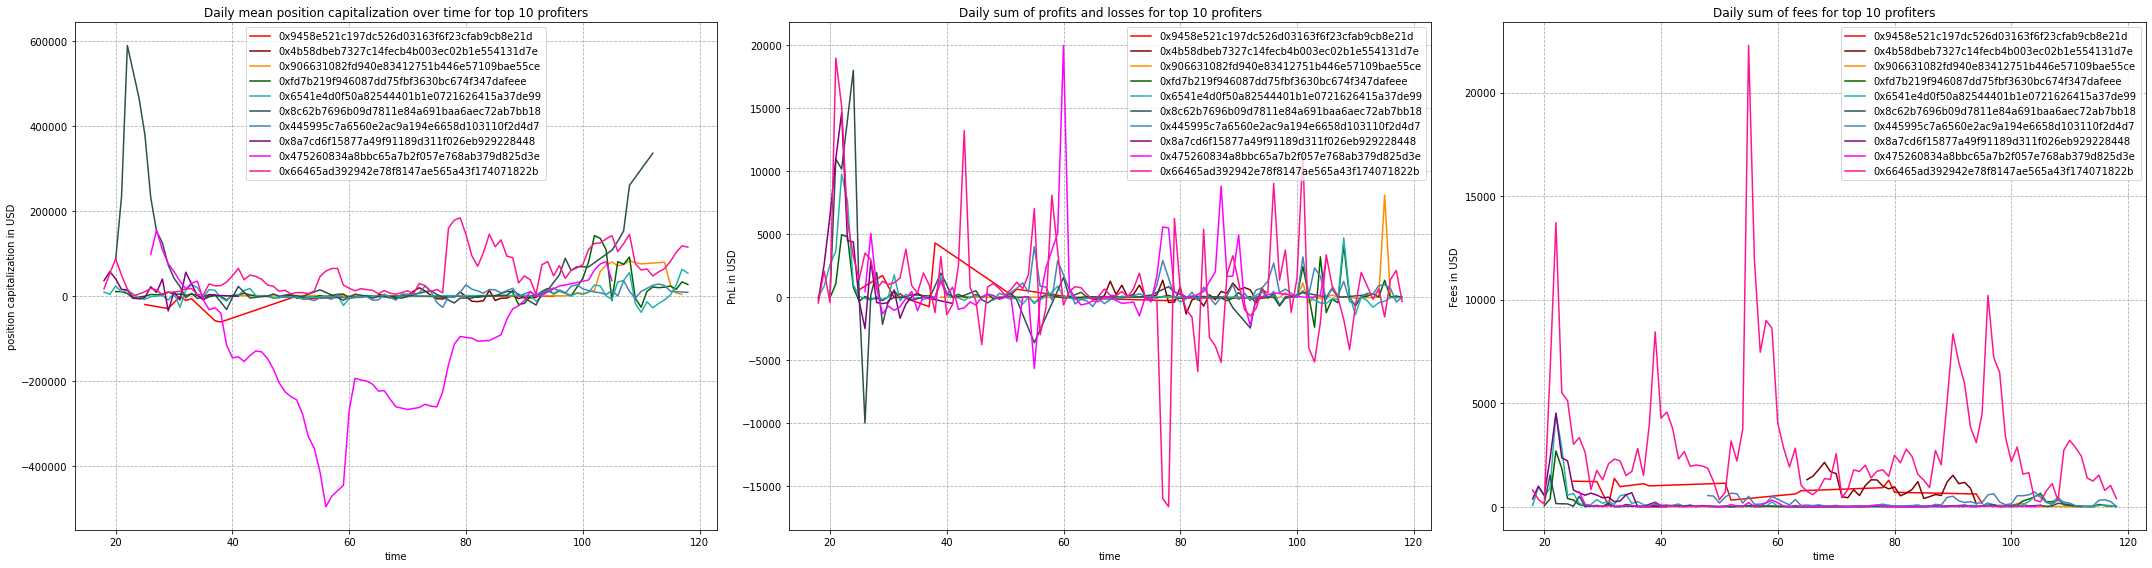

In [63]:
fig = plt.figure(figsize=(30, 8))
index = 0

ax = fig.add_subplot(1, 3, 1)
for trader in trader_avax_position_changes_df.tail(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "open_notional"]].groupby("day_of_year").mean()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["open_notional"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("position capitalization in USD")
    ax.set_title("Daily mean position capitalization over time for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

index = 0

ax = fig.add_subplot(1, 3, 2)
for trader in trader_avax_position_changes_df.tail(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "realized_pnl"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["realized_pnl"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("PnL in USD")
    ax.set_title("Daily sum of profits and losses for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1
    
index = 0

ax = fig.add_subplot(1, 3, 3)
for trader in trader_avax_position_changes_df.tail(10).index:
    traderwise_data_df = avax_position_changes_df[avax_position_changes_df["trader"] == trader].sort_values("time")
    daily_traderwise_data_df = traderwise_data_df[["day_of_year", "fee"]].groupby("day_of_year").sum()
    ax.plot(daily_traderwise_data_df[daily_traderwise_data_df.index < 200].index,
            daily_traderwise_data_df[daily_traderwise_data_df.index < 200]["fee"],
            color=colors[index], label=trader)
    ax.set_xlabel("time")
    ax.set_ylabel("Fees in USD")
    ax.set_title("Daily sum of fees for top 10 profiters")
    ax.legend()
    ax.grid(True, linestyle='--')
    index += 1

fig.tight_layout()
plt.show()

# Listing top traders from all reviewed above pools

Here will collected information about the top 10 profiters and lossers of each pool for further analysis and it will be required to further to check which addresses were performing on what pools

In [64]:
top_pools_names = ["vBTC", "vETH", "vPERP", "vMATIC", "vLUNA", "vAVAX"]
list_of_top_traders = []

for pool in top_pools_names:
    top_pool_position_changes_df = position_changes_df[position_changes_df["pool_name"] == pool]
    traders_top_pool_data = top_pool_position_changes_df[["trader", "realized_pnl"]].groupby("trader").sum(
                                                                                    ).sort_values("realized_pnl")
    top_pool_lossers = traders_top_pool_data.head(10).index
    top_pool_profiters = traders_top_pool_data.tail(10).index
    list_of_top_traders.extend(top_pool_lossers)
    list_of_top_traders.extend(top_pool_profiters)
    
clean_list_top_traders = list(set(list_of_top_traders))
len(clean_list_top_traders)

90

There are 90 unique traders that got extreme losses and profits out of their activity. It is possible to review their behavior on all of the pools and check how many pools were influenced by their activity 

# Creating CSR matrix of visited pools

In [65]:
# to make a csr matrix (for fast count estimation) will be used libs below
from scipy import sparse
from pandas.api.types import CategoricalDtype

amm_trader_list = []

for amm in position_changes_df['pool_name'].unique():
    amm_story = position_changes_df[position_changes_df['pool_name'] == amm]
    amm_trader_df = pd.DataFrame(columns=['pool_name', 'trader'])
    amm_trader_df['trader'] = amm_story['trader'].unique()
    amm_trader_df['pool_name'] = [amm] * len(amm_story['trader'].unique())
    amm_trader_list.append(amm_trader_df)
    
traders_amm_df = pd.concat(amm_trader_list)
traders_amm_df["count"] = [1] * len(traders_amm_df)
traders_amm_df

pool_name                                      trader  count
0       vBTC  0x9c1e0c67aa30c063f341885b12cb81cc94613fc7      1
1       vBTC  0xd087966b4d2b1841c88b4d62b407d5ef1a465ac3      1
2       vBTC  0x35952141922ee99a04e016c967c3f0ad589ea958      1
3       vBTC  0xefc0d892656eeb59a0b54a6b4f2a0d2fad4b66c8      1
4       vBTC  0x02cc0130ffedf077a848606b7a3e018f7f7434af      1
..       ...                                         ...    ...
70      vAPE  0x03853b09108931c5c8ff9b1a7de689e7e76e7711      1
71      vAPE  0xa2a317609015cd0b1ea92d323ec500664d98cfe6      1
72      vAPE  0xea414355a738d5715379db885db889049c20fc92      1
73      vAPE  0xbfd14e128873f89861ce7cf6d1b80afe10847e60      1
74      vAPE  0xe0f61822b45bb03cdc581283287941517810d7ba      1

[14556 rows x 3 columns]

In [66]:
users = traders_amm_df["trader"].unique()
amms = traders_amm_df["pool_name"].unique()
shape = (len(users), len(amms))

user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
amms_cat = CategoricalDtype(categories=sorted(amms), ordered=True)

user_index = traders_amm_df["trader"].astype(user_cat).cat.codes
amm_index = traders_amm_df["pool_name"].astype(amms_cat).cat.codes

# Conversion via COO matrix
coo = sparse.coo_matrix((traders_amm_df["count"], (user_index, amm_index)), shape=shape)
csr = coo.tocsr()

In [67]:
stats_df = pd.DataFrame.sparse.from_spmatrix(csr, columns=amms_cat.categories)
stats_df.index = user_cat.categories
stats_df['occurencies_sum'] = stats_df.sum(axis=1)
stats_df

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x000000000a38444e0a6e37d3b630d7e855a7cb13      0     0      0      0     0   
0x00004bbaaa33277a699146f220c2edc01ae96501      0     0      1      0     0   
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54      0     0      0      0     0   
0x000872be5ec7dc8197ef6618ef507d9a449cac1a      0     0      0      0     0   
0x000ed00d03833d52ca64312387a0a08e6ef57f76      0     0      0      0     0   
...                                           ...   ...    ...    ...   ...   
0xffdf4eb71c453bebc5e2672d70c1330164683071      0     0      0      0     0   
0xffeb037c74faf4466edd9554d4e281b93ab2ff26      0     0      0      0     0   
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7      0     0      0      0     0   
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3      0     0      0      0     0   
0xfffb40347816873ca038756cc87bc610144166b2      0     0      0      0     0   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x000000000a38444e0a6e37d3b630d7e855a7cb13     0     0     1      0     0   
0x00004bbaaa33277a699146f220c2edc01ae96501     0     0     0      1     1   
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54     0     0     1      0     0   
0x000872be5ec7dc8197ef6618ef507d9a449cac1a     1     0     0      0     0   
0x000ed00d03833d52ca64312387a0a08e6ef57f76     0     0     1      0     0   
...                                          ...   ...   ...    ...   ...   
0xffdf4eb71c453bebc5e2672d70c1330164683071     0     0     0      0     0   
0xffeb037c74faf4466edd9554d4e281b93ab2ff26     0     0     1      0     0   
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7     0     0     1      0     0   
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3     0     0     1      0     0   
0xfffb40347816873ca038756cc87bc610144166b2     0     0     1      0     0   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x000000000a38444e0a6e37d3b630d7e855a7cb13      0      1       0      0     0   
0x00004bbaaa33277a699146f220c2edc01ae96501      1      0       0      0     1   
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54      0      0       0      0     0   
0x000872be5ec7dc8197ef6618ef507d9a449cac1a      0      0       0      0     0   
0x000ed00d03833d52ca64312387a0a08e6ef57f76      0      0       0      0     0   
...                                           ...    ...     ...    ...   ...   
0xffdf4eb71c453bebc5e2672d70c1330164683071      0      0       0      1     0   
0xffeb037c74faf4466edd9554d4e281b93ab2ff26      0      0       0      0     0   
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7      0      0       0      0     0   
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3      0      0       0      0     0   
0xfffb40347816873ca038756cc87bc610144166b2      0      0       0      0     0   

                                            vPERP  vSAND  vSOL  \
0x000000000a38444e0a6e37d3b630d7e855a7cb13      0      0     0   
0x00004bbaaa33277a699146f220c2edc01ae96501      0      0     0   
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54      0      0     0   
0x000872be5ec7dc8197ef6618ef507d9a449cac1a      0      0     0   
0x000ed00d03833d52ca64312387a0a08e6ef57f76      0      0     0   
...                                           ...    ...   ...   
0xffdf4eb71c453bebc5e2672d70c1330164683071      0      0     0   
0xffeb037c74faf4466edd9554d4e281b93ab2ff26      0      0     0   
0xffee0f6a4aff3e9644a6bb3239f3fb4ee32482e7      0      0     0   
0xfff69ccaffd53e68b056d0e7d24fc941b033eec3      0      0     0   
0xfffb40347816873ca038756cc87bc610144166b2      0      0     0   

                                            occurencies_sum  
0x000000000a38444e0a6e37d3b630d7e855a7cb13                2  
0x00004bbaaa33277a699146f220c2edc01ae96501                5  
0x00069a4bf1b2a8d5eded8e91347dbaa70796ff54                1  
0x000872be5ec7dc8197ef6618ef507d9a449cac1a                1  
0x000ed00d03833d52ca64312387a0a08e6ef57f76                1  
...                             

In [68]:
stats_df["occurencies_sum"].max()

16

Even considering that platform is not allowing to have positions set in more than 5 pools there are addresses that during entire reviewed period have touched 16 pools

In [69]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max()]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x377e6326a8e2ce4a856d31605ca33505ad2b57b1      0     0      1      1     1   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x377e6326a8e2ce4a856d31605ca33505ad2b57b1     1     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x377e6326a8e2ce4a856d31605ca33505ad2b57b1      1      1       1      1     1   

                                            vPERP  vSAND  vSOL  \
0x377e6326a8e2ce4a856d31605ca33505ad2b57b1      1      1     1   

                                            occurencies_sum  
0x377e6326a8e2ce4a856d31605ca33505ad2b57b1               16

In [70]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 1]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0xc04509cdc603589e79612576edeae16c1f00d2c6      0     0      1      1     1   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0xc04509cdc603589e79612576edeae16c1f00d2c6     0     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0xc04509cdc603589e79612576edeae16c1f00d2c6      1      1       1      1     1   

                                            vPERP  vSAND  vSOL  \
0xc04509cdc603589e79612576edeae16c1f00d2c6      1      1     1   

                                            occurencies_sum  
0xc04509cdc603589e79612576edeae16c1f00d2c6               15

In [71]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 2]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x452029171b97da85782abc50d32e241d7b51ae2b      0     0      1      1     1   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x452029171b97da85782abc50d32e241d7b51ae2b     1     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x452029171b97da85782abc50d32e241d7b51ae2b      1      1       0      1     1   

                                            vPERP  vSAND  vSOL  \
0x452029171b97da85782abc50d32e241d7b51ae2b      0      1     1   

                                            occurencies_sum  
0x452029171b97da85782abc50d32e241d7b51ae2b               14

In [72]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 3]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x191aee23b460a79537c3b968f9d67546a9ef82e4      1     0      1      1     1   
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4      1     1      1      1     0   
0x969a524dc7e46f0def44352c11b2296d37ef6e23      1     0      1      1     0   
0xaaeb47b8e363a0f548377b7fc959b28722057b40      0     0      1      1     0   
0xd94606128b20680539a719b07bca6cbc30786a28      1     0      1      0     0   
0xdf92d4ba1d9f2c99d83797f18706cbced292984f      0     0      1      1     0   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x191aee23b460a79537c3b968f9d67546a9ef82e4     1     0     1      0     1   
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4     0     1     0      1     1   
0x969a524dc7e46f0def44352c11b2296d37ef6e23     0     1     1      0     1   
0xaaeb47b8e363a0f548377b7fc959b28722057b40     0     1     1      1     1   
0xd94606128b20680539a719b07bca6cbc30786a28     1     1     1      1     1   
0xdf92d4ba1d9f2c99d83797f18706cbced292984f     1     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x191aee23b460a79537c3b968f9d67546a9ef82e4      1      1       0      1     1   
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4      0      1       1      1     0   
0x969a524dc7e46f0def44352c11b2296d37ef6e23      0      1       1      1     1   
0xaaeb47b8e363a0f548377b7fc959b28722057b40      1      1       0      1     1   
0xd94606128b20680539a719b07bca6cbc30786a28      1      1       0      1     1   
0xdf92d4ba1d9f2c99d83797f18706cbced292984f      1      1       0      1     1   

                                            vPERP  vSAND  vSOL  \
0x191aee23b460a79537c3b968f9d67546a9ef82e4      0      1     1   
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4      1      1     1   
0x969a524dc7e46f0def44352c11b2296d37ef6e23      1      1     1   
0xaaeb47b8e363a0f548377b7fc959b28722057b40      1      1     1   
0xd94606128b20680539a719b07bca6cbc30786a28      1      1     0   
0xdf92d4ba1d9f2c99d83797f18706cbced292984f      1      0     1   

                                            occurencies_sum  
0x191aee23b460a79537c3b968f9d67546a9ef82e4               13  
0x8fb5c6f3c336033deeedbb54ad95e96453c9eaa4               13  
0x969a524dc7e46f0def44352c11b2296d37ef6e23               13  
0xaaeb47b8e363a0f548377b7fc959b28722057b40               13  
0xd94606128b20680539a719b07bca6cbc30786a28               13  
0xdf92d4ba1d9f2c99d83797f18706cbced292984f               13

In [73]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 4]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x698fa9d90a61a190648cbb9e0e938ba0735e32a8      1     1      1      1     0   
0x76762a45b9ea3ac34c8750df040f56a2bd438644      1     1      0      0     0   
0x99c25959b1042edf940e9bece9daa751879ea6dc      1     0      0      1     1   
0xa6f1eeb7edd262fcf6a57c8b9e2e49e955f51c90      0     0      1      1     0   
0xd6d279b961e071417d507fb75811bb0134e7f0b3      1     1      0      1     1   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x698fa9d90a61a190648cbb9e0e938ba0735e32a8     1     1     1      0     1   
0x76762a45b9ea3ac34c8750df040f56a2bd438644     1     1     1      0     1   
0x99c25959b1042edf940e9bece9daa751879ea6dc     1     0     1      1     1   
0xa6f1eeb7edd262fcf6a57c8b9e2e49e955f51c90     1     1     1      1     1   
0xd6d279b961e071417d507fb75811bb0134e7f0b3     1     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x698fa9d90a61a190648cbb9e0e938ba0735e32a8      0      1       0      1     1   
0x76762a45b9ea3ac34c8750df040f56a2bd438644      1      1       0      1     1   
0x99c25959b1042edf940e9bece9daa751879ea6dc      0      0       0      1     1   
0xa6f1eeb7edd262fcf6a57c8b9e2e49e955f51c90      1      1       0      0     1   
0xd6d279b961e071417d507fb75811bb0134e7f0b3      1      0       0      1     0   

                                            vPERP  vSAND  vSOL  \
0x698fa9d90a61a190648cbb9e0e938ba0735e32a8      0      0     1   
0x76762a45b9ea3ac34c8750df040f56a2bd438644      1      1     0   
0x99c25959b1042edf940e9bece9daa751879ea6dc      1      1     1   
0xa6f1eeb7edd262fcf6a57c8b9e2e49e955f51c90      0      1     1   
0xd6d279b961e071417d507fb75811bb0134e7f0b3      0      0     1   

                                            occurencies_sum  
0x698fa9d90a61a190648cbb9e0e938ba0735e32a8               12  
0x76762a45b9ea3ac34c8750df040f56a2bd438644               12  
0x99c25959b1042edf940e9bece9daa751879ea6dc               12  
0xa6f1eeb7edd262fcf6a57c8b9e2e49e955f51c90               12  
0xd6d279b961e071417d507fb75811bb0134e7f0b3               12

In [74]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 5]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0xceb3c6c081e51848386946cf732913e7664cf3e2      0     0      1      1     0   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0xceb3c6c081e51848386946cf732913e7664cf3e2     1     1     1      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0xceb3c6c081e51848386946cf732913e7664cf3e2      1      1       0      0     0   

                                            vPERP  vSAND  vSOL  \
0xceb3c6c081e51848386946cf732913e7664cf3e2      1      0     1   

                                            occurencies_sum  
0xceb3c6c081e51848386946cf732913e7664cf3e2               11

In [75]:
stats_df[stats_df["occurencies_sum"] == stats_df["occurencies_sum"].max() - 6]

vAAVE  vAPE  vATOM  vAVAX  vBNB  \
0x16c1290edac9147c36039b21986faa7546a8bfaf      0     0      1      1     0   
0x1d16ea2b8bfcf5f7c13c1ea792d6c6a7a9aa1063      0     0      1      1     0   
0x422a87faf03c753bbd39c5cb4b6a0eb0b311ecb3      1     1      0      1     0   
0x463ae76e81da51a014cf5ef085666339acc7d5b0      0     0      0      1     0   
0x5c2b357558d45b1a2a590292749af1a961199591      0     0      1      0     0   
0x712c07eaadd8a72627fce7976b6521e7704448d6      0     0      1      1     0   
0x76edfce9d65774841e26a9926f50f543d484bf78      0     0      1      1     1   
0x8a88dfcc83c2999a81634899f55512a88d0d84b2      0     0      0      1     1   
0xab4990b6b3fdfa1d56701bea91fe68136fdd47e7      0     0      0      1     1   
0xadff895d356f365f4bb5c110afe48c677d1b5f51      1     0      1      1     0   
0xafa00726af4abc5e68225a18419d6658f5eb7168      1     0      1      0     0   
0xc0a13a3850b7a01e068e18edb1918d091cb10e4a      0     0      1      1     0   
0xc3bfbca84c2737ccdf40916ee4aa033cee19249e      0     0      1      1     0   
0xc88475a62ed9d3747f3dcada35216a66122ef291      1     0      1      1     1   
0xcd94e8616d58e726e11214fc5e6fe69421bdaf96      0     0      1      1     0   
0xde31ebd04738bc34720b7c554778a244f1d3e463      0     0      1      0     0   
0xf6a10e74ca923ffc9900105c084d0cd2fd6c90d7      0     1      0      1     0   

                                            vBTC  vCRV  vETH  vFLOW  vFTM  \
0x16c1290edac9147c36039b21986faa7546a8bfaf     1     0     1      1     0   
0x1d16ea2b8bfcf5f7c13c1ea792d6c6a7a9aa1063     1     1     1      0     0   
0x422a87faf03c753bbd39c5cb4b6a0eb0b311ecb3     1     1     1      1     0   
0x463ae76e81da51a014cf5ef085666339acc7d5b0     0     1     1      1     1   
0x5c2b357558d45b1a2a590292749af1a961199591     1     1     1      1     1   
0x712c07eaadd8a72627fce7976b6521e7704448d6     1     1     1      0     0   
0x76edfce9d65774841e26a9926f50f543d484bf78     1     1     1      1     0   
0x8a88dfcc83c2999a81634899f55512a88d0d84b2     1     1     1      0     0   
0xab4990b6b3fdfa1d56701bea91fe68136fdd47e7     1     0     1      1     1   
0xadff895d356f365f4bb5c110afe48c677d1b5f51     1     1     1      0     0   
0xafa00726af4abc5e68225a18419d6658f5eb7168     1     1     0      0     0   
0xc0a13a3850b7a01e068e18edb1918d091cb10e4a     1     1     1      0     0   
0xc3bfbca84c2737ccdf40916ee4aa033cee19249e     1     1     0      0     1   
0xc88475a62ed9d3747f3dcada35216a66122ef291     0     1     0      1     0   
0xcd94e8616d58e726e11214fc5e6fe69421bdaf96     1     0     1      0     1   
0xde31ebd04738bc34720b7c554778a244f1d3e463     1     1     1      1     1   
0xf6a10e74ca923ffc9900105c084d0cd2fd6c90d7     0     1     0      1     1   

                                            vLINK  vLUNA  vMATIC  vNEAR  vONE  \
0x16c1290edac9147c36039b21986faa7546a8bfaf      1      0       1      1     1   
0x1d16ea2b8bfcf5f7c13c1ea792d6c6a7a9aa1063      1      1       0      0     1   
0x422a87faf03c753bbd39c5cb4b6a0eb0b311ecb3      0      1       1      1     0   
0x463ae76e81da51a014cf5ef085666339acc7d5b0      0      1       1      1     0   
0x5c2b357558d45b1a2a590292749af1a961199591      0      0       0      1     1   
0x712c07eaadd8a72627fce7976b6521e7704448d6      1      1       0      0     1   
0x76edfce9d65774841e26a9926f50f543d484bf78      1      0       0      0     0   
0x8a88dfcc83c2999a81634899f55512a88d0d84b2      1      1       1      0     0   
0xab4990b6b3fdfa1d56701bea91fe68136fdd47e7      1      1       0      1     0   
0xadff895d356f365f4bb5c110afe48c677d1b5f51      0      0       0      0     1   
0xafa00726af4abc5e68225a18419d6658f5eb7168      1      1       0      0     1   
0xc0a13a3850b7a01e068e18edb1918d091cb10e4a      0      1       0      1     0   
0xc3bfbca84c2737ccdf40916ee4aa033cee19249e      0      0       1      1     0   
0xc88475a62ed9d3747f3dcada35216a66122ef291      0      0       0      1     1   
0xcd94e8616d58e726e